In [1]:
suppressMessages(library(SingleCellExperiment))
suppressMessages(library(scater))
options(stringsAsFactors = FALSE)
setwd("~/projects/training")

In [150]:
wholeanno <-read.table('data/GSE_expreesionmx_binary_annotation_plusbatch_whole.txt',sep=',',header=T)

In [111]:
wholeanno$Class <- "Ctrl"
wholeanno[which(wholeanno$class=="Colorectal Cancer"),"Class"] <- "CRC"

In [112]:
wholeanno$Sample_ID

[1] "Sample_1S3"  "Sample_1S6"  "Sample_1S9"  "Sample_1S12" "Sample_1S15"
  [6] "Sample_1S18" "Sample_1S21" "Sample_1S24" "Sample_4S2"  "Sample_4S5" 
 [11] "Sample_4S8"  "Sample_4S11" "Sample_4S14" "Sample_4S17" "Sample_4S20"
 [16] "Sample_4S23" "Sample_N1"   "Sample_N7"   "Sample_N13"  "Sample_N19" 
 [21] "Sample_N25"  "Sample_N31"  "Sample_N37"  "Sample_N43"  "Sample_2S1" 
 [26] "Sample_2S4"  "Sample_2S7"  "Sample_2S10" "Sample_2S13" "Sample_2S16"
 [31] "Sample_2S19" "Sample_2S22" "Sample_4S3"  "Sample_4S6"  "Sample_4S9" 
 [36] "Sample_4S12" "Sample_4S15" "Sample_4S18" "Sample_4S21" "Sample_4S24"
 [41] "Sample_N2"   "Sample_N8"   "Sample_N14"  "Sample_N20"  "Sample_N26" 
 [46] "Sample_N32"  "Sample_N38"  "Sample_N44"  "Sample_2S2"  "Sample_2S5" 
 [51] "Sample_2S8"  "Sample_2S11" "Sample_2S14" "Sample_2S17" "Sample_2S20"
 [56] "Sample_2S23" "Sample_N3"   "Sample_N9"   "Sample_N15"  "Sample_N21" 
 [61] "Sample_N27"  "Sample_N33"  "Sample_N39"  "Sample_N45"  "Sample_2S3" 
 [66] "Sample_2S6"  "Sample_2S9"  "Sample_2S12" "Sample_2S15" "Sample_2S18"
 [71] "Sample_2S21" "Sample_2S24" "Sample_N4"   "Sample_N10"  "Sample_N16" 
 [76] "Sample_N22"  "Sample_N28"  "Sample_N34"  "Sample_N40"  "Sample_N46" 
 [81] "Sample_3S1"  "Sample_3S4"  "Sample_3S7"  "Sample_3S10" "Sample_3S13"
 [86] "Sample_3S16" "Sample_3S19" "Sample_3S22" "Sample_N5"   "Sample_N11" 
 [91] "Sample_N17"  "Sample_N23"  "Sample_N29"  "Sample_N35"  "Sample_N41" 
 [96] "Sample_N47"  "Sample_2S25" "Sample_3S2"  "Sample_3S5"  "Sample_3S8" 
[101] "Sample_3S11" "Sample_3S14" "Sample_3S17" "Sample_3S20" "Sample_3S23"
[106] "Sample_N6"   "Sample_N12"  "Sample_N18"  "Sample_N24"  "Sample_N30" 
[111] "Sample_N36"  "Sample_N42"  "Sample_N48"  "Sample_1S1"  "Sample_1S4" 
[116] "Sample_1S7"  "Sample_1S10" "Sample_1S13" "Sample_1S16" "Sample_1S19"
[121] "Sample_1S22" "Sample_3S3"  "Sample_3S6"  "Sample_3S9"  "Sample_3S12"
[126] "Sample_3S15" "Sample_3S18" "Sample_3S21" "Sample_3S24" "Sample_3S25"
[131] "Sample_N50"  "Sample_1S2"  "Sample_1S5"  "Sample_1S8"  "Sample_1S11"
[136] "Sample_1S14" "Sample_1S17" "Sample_1S20" "Sample_1S23" "Sample_1S25"
[141] "Sample_4S1"  "Sample_4S4"  "Sample_4S7"  "Sample_4S10" "Sample_4S13"
[146] "Sample_4S16" "Sample_4S19" "Sample_4S22" "Sample_4S25" "Sample_N49"

In [113]:
head(wholeanno)

Sample_ID   Sample_ID.1 class             RNA.Isolation.batch
1 Sample_1S3  Sample_1S3  Colorectal Cancer 2                  
2 Sample_1S6  Sample_1S6  Colorectal Cancer 6                  
3 Sample_1S9  Sample_1S9  Colorectal Cancer 1                  
4 Sample_1S12 Sample_1S12 Colorectal Cancer 3                  
5 Sample_1S15 Sample_1S15 Colorectal Cancer 4                  
6 Sample_1S18 Sample_1S18 Colorectal Cancer 5                  
  library.prepration.day gel.cut.size.selection Class
1 22                     1                      CRC  
2 23                     1                      CRC  
3 23                     1                      CRC  
4 25                     7                      CRC  
5 26                     5                      CRC  
6 25                     6                      CRC

In [114]:
raw_mx <- read.table('data/GSE_expreesionmx_binary.txt', row.names = 1,skip=1,sep = ",")
colnames(raw_mx)<-read.table('data/GSE_expreesionmx_binary_header.txt', row.names = 1,skip=1,sep = ",")$V2


In [115]:
rowsums <-rowSums(raw_mx)
rowsumind <-order(-rowsums)
top20name <-rownames(raw_mx)[rowsumind[1:20]]
top20name

[1] "ENST00000384906.1|MIR99A-201|81"    "ENST00000362190.3|MIR22-201|85"    
 [3] "ENST00000385302.1|MIR320A-201|82"   "ENST00000385259.1|MIR100-201|80"   
 [5] "ENST00000364908.1|Y_RNA.293-201|93" "ENST00000362309.3|MIRLET7I-201|84" 
 [7] "ENST00000384921.4|MIR128-1-201|82"  "ENST00000384893.1|MIR128-2-201|84" 
 [9] "ENST00000362207.3|MIR129-2-201|90"  "ENST00000384972.2|MIR129-1-201|72" 
[11] "ENST00000385026.1|MIR181A1-201|110" "ENST00000385084.1|MIR9-3-201|90"   
[13] "ENST00000384838.1|MIR9-2-201|87"    "ENST00000385198.3|MIR9-1-201|89"   
[15] "ENST00000385140.1|MIRLET7B-201|83"  "piR-hsa-23317|piR-hsa-23317|31"    
[17] "ENST00000384863.1|MIR181A2-201|110" "ENST00000362134.1|MIR21-201|72"    
[19] "ENST00000362283.1|MIR30D-201|70"    "ENST00000385240.1|MIR181B1-201|110"

### top20 & thresholding
- 是否需要去除top20
- 是否需要根据counts滤掉一些

In [116]:
new_raw_mx <-raw_mx[-which(rownames(raw_mx) %in% top20name), ]

In [117]:
print (dim(raw_mx))
print (dim(new_raw_mx))

[1] 89619   150
[1] 89599   150


In [118]:
reads <- SingleCellExperiment(
    assays = list(counts = as.matrix(new_raw_mx)),
    colData = wholeanno)
reads

class: SingleCellExperiment 
dim: 89599 150 
metadata(0):
assays(1): counts
rownames(89599): ENST00000473358.1|MIR1302-2HG-202|1544
  ENST00000469289.1|MIR1302-2HG-201|843 ...
  ENST00000365409.1|Y_RNA.350-201|98
  ENST00000516187.1|Y_RNA.666-201|112
rowData names(0):
colnames(150): Sample_1S3 Sample_1S6 ... Sample_N50 Sample_N49
colData names(7): Sample_ID Sample_ID.1 ... gel.cut.size.selection
  Class
reducedDimNames(0):
spikeNames(0):

In [119]:
keep_feature <- rowSums(counts(reads) > 0) > 0
reads <- reads[keep_feature, ]
dim(reads)

[1] 85390   150

In [120]:
reads <-  calculateQCMetrics(reads)

In [121]:
filter_genes <- apply(counts(reads), 1, function(x) length(x[x >= 2]) >= 10)
table(filter_genes)
rowData(reads)$use <- filter_genes
reducedDim(reads) <- NULL
dim(reads[rowData(reads)$use])

filter_genes
FALSE  TRUE 
75285 10105 

[1] 10105   150

In [122]:
assay(reads, "logcounts_raw") <- log2(counts(reads) + 1)
reads.qc <- reads[rowData(reads)$use]
endog_genes <- !rowData(reads.qc)$is_feature_control

In [123]:
saveRDS(reads.qc, file = "new_feature/tmpsave/GSE_binary.rds")
write.csv(counts(reads.qc), "new_feature/tmpsave/GSE_binary.csv")

In [124]:
library(scran)

In [125]:
assay(reads.qc, "logcounts_raw") <- log2(counts(reads.qc) + 1)
# CPM
logcounts(reads.qc) <- log2(calculateCPM(reads.qc, use.size.factors = FALSE) + 1)
# define cluster for each sample
sampleLables <- c()
for(i in colnames(reads.qc)){tmp <- as.character(wholeanno[which(wholeanno$Sample_ID==i),"Class"]); sampleLables <- c(sampleLables,tmp)}
# sampleLables <- quickCluster(reads.qc.impute, min.size = 10)
sampleLables <- replace(sampleLables, which(sampleLables=="CRC"),1)
sampleLables <- replace(sampleLables, which(sampleLables=="Ctrl"),2)
sampleLables <- as.numeric(sampleLables)
reads.qc <- computeSumFactors(reads.qc, sizes = 5, clusters = sampleLables)
reads.qc <- normalize(reads.qc)

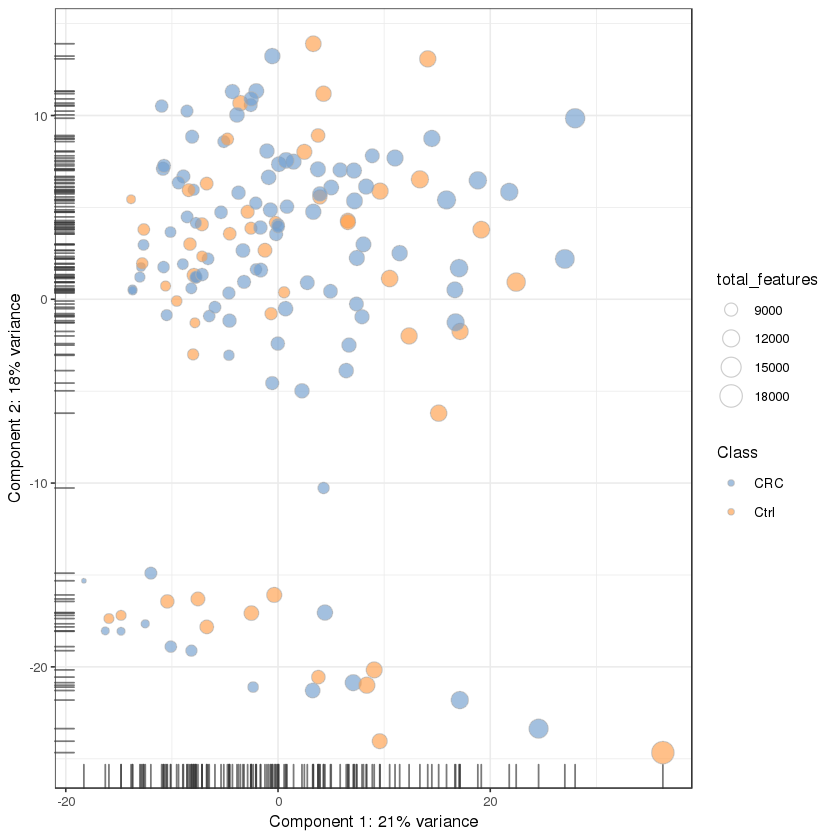

In [126]:
plotPCA(
    reads.qc[endog_genes, ],
    exprs_values = "logcounts_raw",
    colour_by = "Class",
    size_by = "total_features"
)

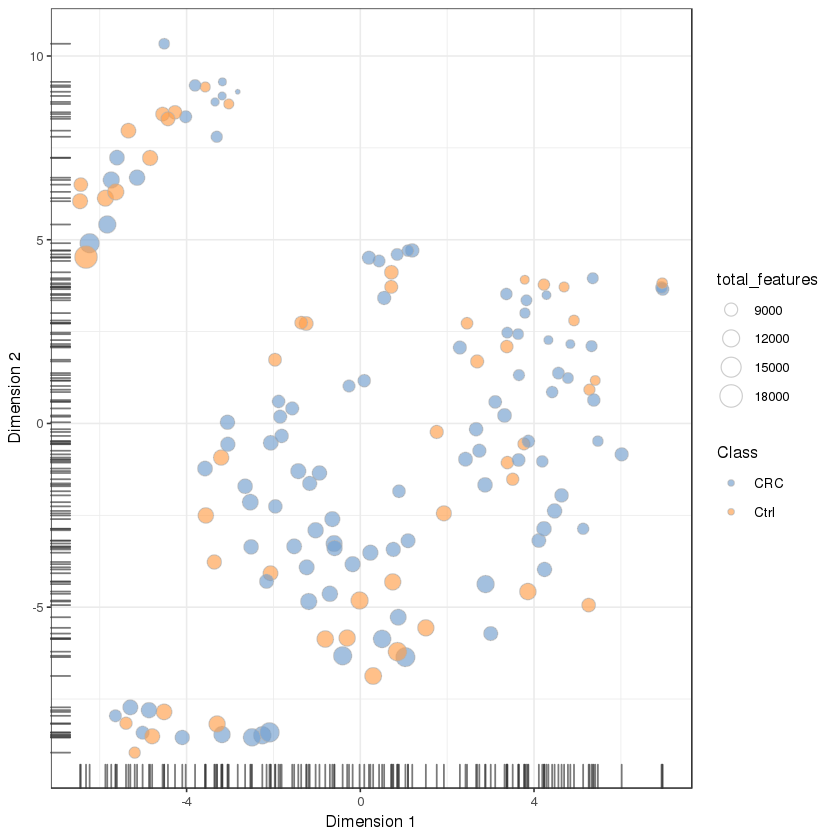

In [127]:
plotTSNE(
    reads.qc[endog_genes,],
    exprs_values = "logcounts_raw",
    colour_by = "Class",
    size_by = "total_features"
)

*******************
## remove batch

In [56]:
library(EDASeq)
library(RUVSeq)
library(sva)
library(scRNA.seq.funcs)

In [83]:
write.csv(logcounts(reads.qc), "data/GSE_binary_afternorm.csv")

In [82]:
logcounts(reads.qc)

Sample_1S3 Sample_1S6 Sample_1S9
ENST00000484859.1|AL627309.5-201|8234  0.000000   0.000000   0.0000000 
ENST00000591702.1|AL669831.5-218|1873  0.902507   1.037585   0.0000000 
ENST00000445118.6|LINC01128-205|31839  0.000000   0.000000   0.0000000 
ENST00000448179.1|AL645608.3-201|3514  0.000000   0.000000   0.0000000 
ENST00000609207.1|AL645608.1-201|4152  0.902507   0.000000   0.9427026 
ENST00000442292.2|AL645608.9-201|1081  0.902507   2.647071   0.9427026 
ENST00000565563.1|AL162741.1-201|1558  0.000000   0.000000   0.0000000 
ENST00000607307.1|AL391244.3-201|1523  0.000000   0.000000   0.0000000 
ENST00000366221.3|AL645728.1-201|2101  0.000000   0.000000   0.0000000 
ENST00000598846.1|AL031282.2-201|34953 2.635956   3.236080   2.4881623 
ENST00000606533.1|AL590822.2-201|4196  0.902507   0.000000   0.9427026 
ENST00000638002.1|AC242022.1-201|2871  0.000000   0.000000   0.0000000 
ENST00000607061.1|AL590438.1-201|3461  1.453451   0.000000   0.0000000 
ENST00000443034.1|AL136528.1-201|9835  1.453451   1.634861   0.0000000 
ENST00000442673.1|LINC01134-203|16822  0.000000   0.000000   0.0000000 
ENST00000412674.1|LINC01346-201|14646  4.663386   3.388891   4.1373609 
ENST00000635247.1|LINC01345-203|4354   0.902507   0.000000   0.0000000 
ENST00000642139.1|AL805961.2-201|6588  0.000000   2.056016   0.0000000 
ENST00000641472.1|AL355602.1-201|5245  0.000000   0.000000   0.0000000 
ENST00000641254.1|BX005132.2-201|9345  0.000000   0.000000   0.0000000 
ENST00000641860.1|Z98259.3-202|3263    0.000000   0.000000   0.0000000 
ENST00000641583.1|Z98259.2-201|1242    4.891773   5.026076   4.7452113 
ENST00000427317.1|CAMTA1-IT1-201|1329  2.991770   2.871199   3.3535006 
ENST00000642135.1|AL034417.4-202|3422  0.000000   0.000000   0.0000000 
ENST00000641100.1|AL034417.3-201|1748  0.000000   1.634861   0.9427026 
ENST00000635687.1|MIR34AHG-203|34382   1.453451   0.000000   0.0000000 
ENST00000606802.1|AL139423.1-201|15093 1.453451   0.000000   0.0000000 
ENST00000310916.6|TMEM51-AS1-201|40650 0.000000   1.634861   0.0000000 
ENST00000428747.1|AL031283.2-201|17197 0.000000   0.000000   0.0000000 
ENST00000427824.1|AL031283.1-201|6455  1.453451   0.000000   1.5080489 
⋮                                      ⋮          ⋮          ⋮         
ENST00000363624.1|Y_RNA.154-201|102     3.514973   5.498797   3.4781152
ENST00000384552.1|Y_RNA.518-201|113     4.450451   4.826421   3.7980254
ENST00000364628.1|Y_RNA.260-201|101     0.000000   1.037585   0.0000000
ENST00000362806.1|Y_RNA.57-201|113      0.000000   1.037585   0.0000000
ENST00000365385.1|Y_RNA.346-201|112     0.000000   0.000000   0.0000000
ENST00000364493.2|Y_RNA.245-201|95      0.000000   1.634861   0.0000000
ENST00000384232.1|Y_RNA.456-201|111     0.902507   1.037585   0.0000000
ENST00000365114.1|Y_RNA.314-201|102     0.000000   0.000000   0.0000000
ENST00000384012.1|Y_RNA.415-201|112     0.902507   0.000000   1.5080489
ENST00000362645.1|Y_RNA.40-201|93      13.277997  13.581508  13.4684771
ENST00000363462.1|Y_RNA.138-201|102     0.902507   1.037585   0.9427026
ENST00000391267.1|Y_RNA.589-201|98      4.804707   4.240116   4.9311166
ENST00000365599.1|Y_RNA.372-201|102     4.804707   5.773263   4.9740770
ENST00000384068.1|Y_RNA.426-201|113     2.418610   3.065144   1.5080489
ENST00000362540.1|Y_RNA.27-201|103     10.419219  10.437200  10.5643478
ENST00000365274.1|Y_RNA.333-201|102    10.425616  10.256547  10.5042486
ENST00000383936.1|Y_RNA.393-201|102     0.000000   0.000000   0.9427026
ENST00000365402.1|Y_RNA.347-201|101     5.446133   4.978692   5.1341654
ENST00000459189.1|Y_RNA.632-201|102     0.902507   2.647071   0.9427026
ENST00000384677.1|Y_RNA.556-201|113     0.000000   1.634861   0.9427026
ENST00000383919.1|Y_RNA.388-201|113     3.620710   4.530355   2.2291272
ENST00000362881.1|Y_RNA.68-201|102      1.453451   1.634861   0.9427026
ENST00000362697.1|Y_RNA.47-201|108      0.902507   1.634861   0.0000000
ENST00000384695.1|Y_RNA.562-201|113     4.200554   5.657670   4.5881533
ENST000

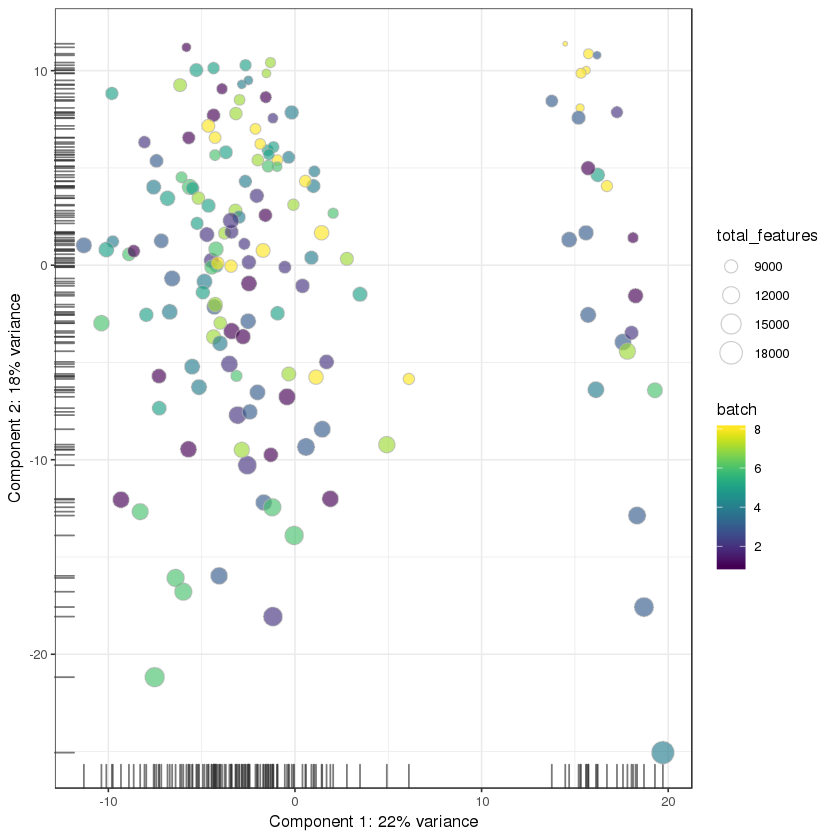

In [81]:
plotPCA(
    reads.qc,
    exprs_values = "logcounts",
    colour_by = "batch",
    size_by = "total_features",
    ntop = 300
)

In [143]:
# RUVs uses centered (technical) replicate/negative control samples for which the covariates of interest are constant
scIdx <- matrix(-1, ncol = max(table(reads.qc$Class)), nrow = 2)
tmp <- which(reads.qc$Class == "CRC")
scIdx[1, 1:length(tmp)] <- tmp
tmp <- which(reads.qc$Class == "Ctrl")
scIdx[2, 1:length(tmp)] <- tmp
#scIdx[1, 1:length(tmp)] <- tmp #测一下不给label什么情况
cIdx <- rownames(reads.qc)

In [153]:
scIdx

[,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13] [,14]
[1,]  1    2    3    4    5    6    7    8    9   10    ⋯     140   141   142  
[2,] 17   18   19   20   21   22   23   24   41   42    ⋯      -1    -1    -1  
     [,15] [,16] [,17] [,18] [,19] [,20] [,21]
[1,] 143   144   145   146   147   148   149  
[2,]  -1    -1    -1    -1    -1    -1    -1

In [144]:
ruvs <- RUVs(logcounts(reads.qc), cIdx, k = 1, scIdx = scIdx, isLog = TRUE)
assay(reads.qc, "ruvs1") <- ruvs$normalizedCounts

In [145]:
ruvs <- RUVs(logcounts(reads.qc), cIdx, k = 1, scIdx = scIdx, isLog = TRUE)
assay(reads.qc, "ruvs1") <- ruvs$normalizedCounts
ruvs <- RUVs(logcounts(reads.qc), cIdx, k = 5, scIdx = scIdx, isLog = TRUE)
assay(reads.qc, "ruvs5") <- ruvs$normalizedCounts
ruvs <- RUVs(logcounts(reads.qc), cIdx, k = 10, scIdx = scIdx, isLog = TRUE)
assay(reads.qc, "ruvs10") <- ruvs$normalizedCounts
ruvs <- RUVs(logcounts(reads.qc), cIdx, k = 20, scIdx = scIdx, isLog = TRUE)
assay(reads.qc, "ruvs20") <- ruvs$normalizedCounts

In [92]:
assay(reads.qc,'ruvs20')

Sample_1S3   Sample_1S6  Sample_1S9  
ENST00000484859.1|AL627309.5-201|8234  -0.4435180   -0.7947270  -0.5260270  
ENST00000591702.1|AL669831.5-218|1873   1.0677437    1.3068484   0.4683587  
ENST00000445118.6|LINC01128-205|31839  -1.2838591   -0.9722180  -1.3150084  
ENST00000448179.1|AL645608.3-201|3514   0.4741356    0.5817205   0.5272697  
ENST00000609207.1|AL645608.1-201|4152  -0.7514099   -1.1849546  -0.6978241  
ENST00000442292.2|AL645608.9-201|1081   1.2281848    1.8144685   0.8228338  
ENST00000565563.1|AL162741.1-201|1558  -0.9297438   -0.8935559  -0.7551916  
ENST00000607307.1|AL391244.3-201|1523   0.8266753    0.7062741   0.9555498  
ENST00000366221.3|AL645728.1-201|2101   1.0201756    0.7659235   1.0753550  
ENST00000598846.1|AL031282.2-201|34953  0.7214551    2.0803523   0.9344535  
ENST00000606533.1|AL590822.2-201|4196   0.8956297    0.2285450   1.0738373  
ENST00000638002.1|AC242022.1-201|2871   2.6798527    2.7697262   2.8911128  
ENST00000607061.1|AL590438.1-201|3461   1.1333646   -0.3157366  -0.2811382  
ENST00000443034.1|AL136528.1-201|9835   3.1799374    3.4253602   1.9382350  
ENST00000442673.1|LINC01134-203|16822   0.8813506    1.0830567   1.0613486  
ENST00000412674.1|LINC01346-201|14646   3.5992865    3.2303994   2.6789281  
ENST00000635247.1|LINC01345-203|4354    1.4135506    0.5013824   0.4314847  
ENST00000642139.1|AL805961.2-201|6588   1.2955028    3.0894150   1.3709028  
ENST00000641472.1|AL355602.1-201|5245  -0.8448266   -0.3706862  -0.7993607  
ENST00000641254.1|BX005132.2-201|9345  -0.1995483   -0.2450728   0.6071763  
ENST00000641860.1|Z98259.3-202|3263    -0.2086262   -0.1243376  -0.1774541  
ENST00000641583.1|Z98259.2-201|1242     0.7939501    0.5492551   0.5633307  
ENST00000427317.1|CAMTA1-IT1-201|1329   2.0354818    1.9673125   2.3784700  
ENST00000642135.1|AL034417.4-202|3422  -0.1565927    0.2067490   0.2061373  
ENST00000641100.1|AL034417.3-201|1748   0.3109142    1.6684160   1.4796220  
ENST00000635687.1|MIR34AHG-203|34382    2.6183004    1.5126683   1.3476209  
ENST00000606802.1|AL139423.1-201|15093  0.1032948   -1.1592047  -0.9427933  
ENST00000310916.6|TMEM51-AS1-201|40650 -0.7990341    0.9656598  -0.5956494  
ENST00000428747.1|AL031283.2-201|17197 -1.2388897   -1.6009882  -1.2759690  
ENST00000427824.1|AL031283.1-201|6455   2.6486846    1.4273260   3.0153019  
⋮                                      ⋮            ⋮           ⋮           
ENST00000363624.1|Y_RNA.154-201|102    -1.917326885 -1.36360169 -1.454258246
ENST00000384552.1|Y_RNA.518-201|113     0.420081254  1.01622333 -0.003462088
ENST00000364628.1|Y_RNA.260-201|101     0.005974644  0.53358923  0.386176749
ENST00000362806.1|Y_RNA.57-201|113     -1.986951909 -0.93496475 -1.888580853
ENST00000365385.1|Y_RNA.346-201|112    -1.803592613 -1.68676231 -1.742390566
ENST00000364493.2|Y_RNA.245-201|95     -2.509223122 -1.06356195 -2.192313640
ENST00000384232.1|Y_RNA.456-201|111    -0.893240621 -1.39017860 -1.771672451
ENST00000365114.1|Y_RNA.314-201|102    -0.521933939 -0.31702034 -0.621347461
ENST00000384012.1|Y_RNA.415-201|112     0.980029061  0.52345290  1.588995963
ENST00000362645.1|Y_RNA.40-201|93       9.837546434  9.98731553  9.951038342
ENST00000363462.1|Y_RNA.138-201|102     1.319480469  0.85317075  1.518096713
ENST00000391267.1|Y_RNA.589-201|98      1.367929389  1.09485750  1.504794723
ENST00000365599.1|Y_RNA.372-201|102     1.625832168  2.13051101  2.042062168
ENST00000384068.1|Y_RNA.426-201|113     1.650672302  1.39727359  0.483589339
ENST00000362540.1|Y_RNA.27-201|103      7.057349340  7.12822094  7.210129792
ENST00000365274.1|Y_RNA.333-201|102     7.019879687  6.97419544  7.070830507
ENST00000383936.1|Y_RNA.393-201|102    -2.164108659 -2.02052262 -1.336169591
ENST00000365402.1|Y_RNA.347-201|101     2.212148588  1.75053652  1.961628792
ENST00000459189.1|Y_RNA.632-201|102    -0.155939295  0.46066260  0.025961203
ENST00000384677.1|Y_RNA.556-201|113    -0.655720824  0.04892731  0.072501230
ENST00000383919.1|Y_RNA.388-201|113

In [100]:
write.csv(assay(reads.qc,'ruvs1'), "data/GSE_binary_batch_ruvs1_noclassinfo.csv")
write.csv(assay(reads.qc,'ruvs5'), "data/GSE_binary_batch_ruvs5_noclassinfo.csv")
write.csv(assay(reads.qc,'ruvs10'), "data/GSE_binary_batch_ruvs10_noclassinfo.csv")
write.csv(assay(reads.qc,'ruvs20'), "data/GSE_binary_batch_ruvs20_noclassinfo.csv")

null device 
          1

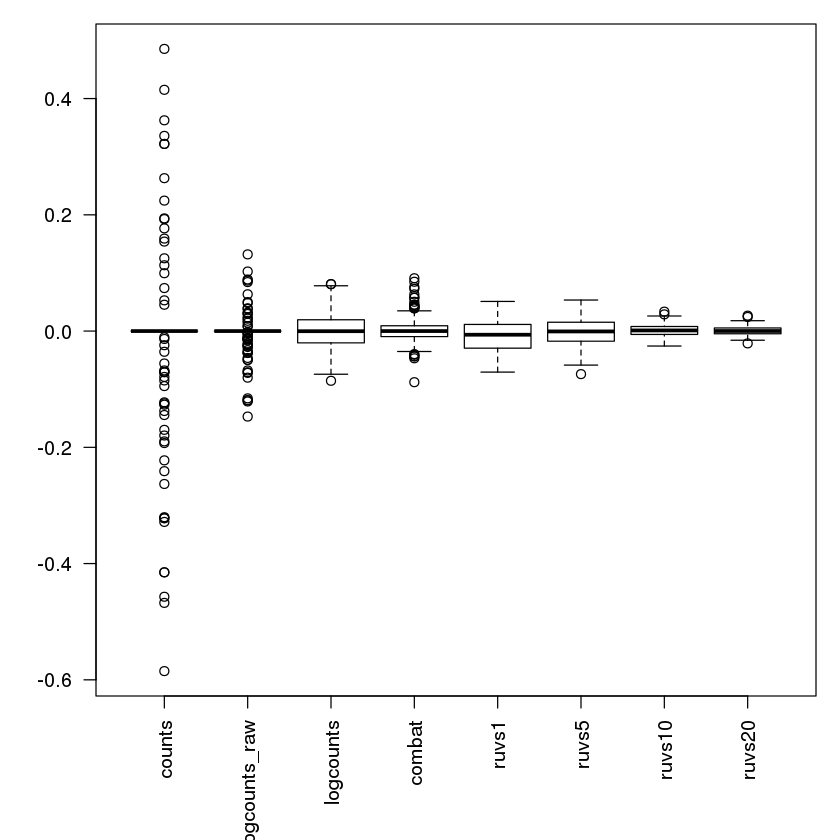

In [147]:
res <- list()
for(n in assayNames(reads.qc)) {
    res[[n]] <- suppressWarnings(calc_cell_RLE(assay(reads.qc, n)))
}
par(mar=c(6,4,1,1))
boxplot(res, las=2)
dev.off()

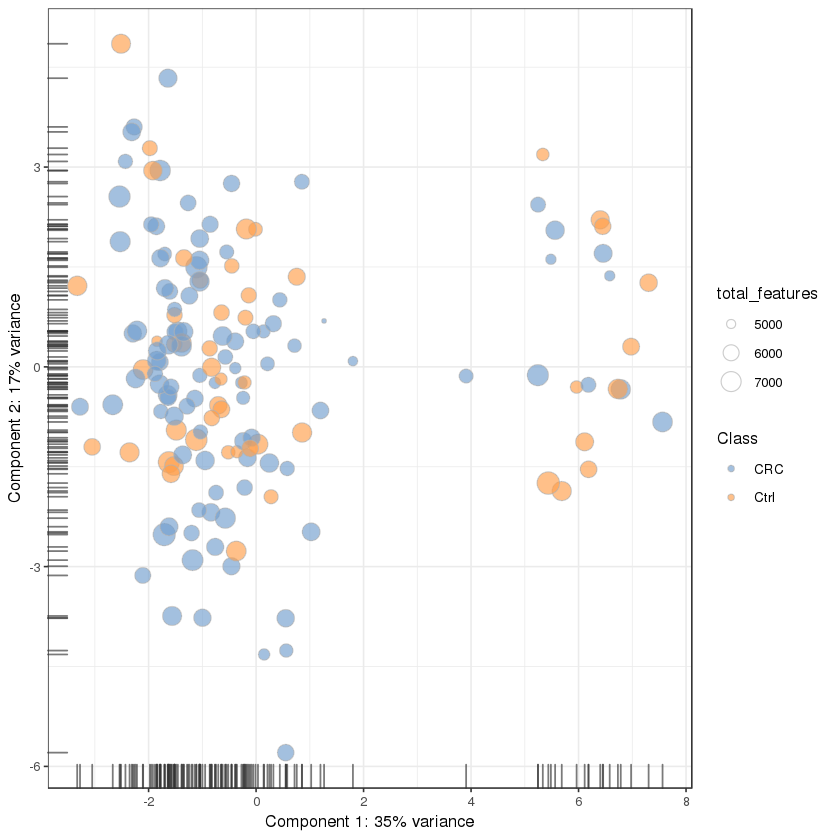

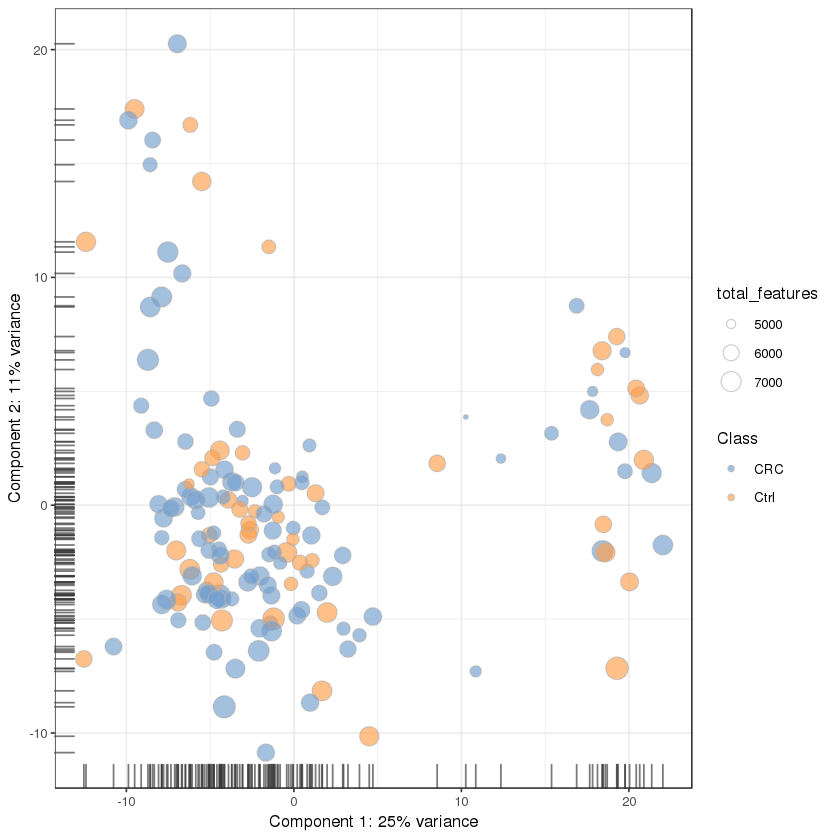

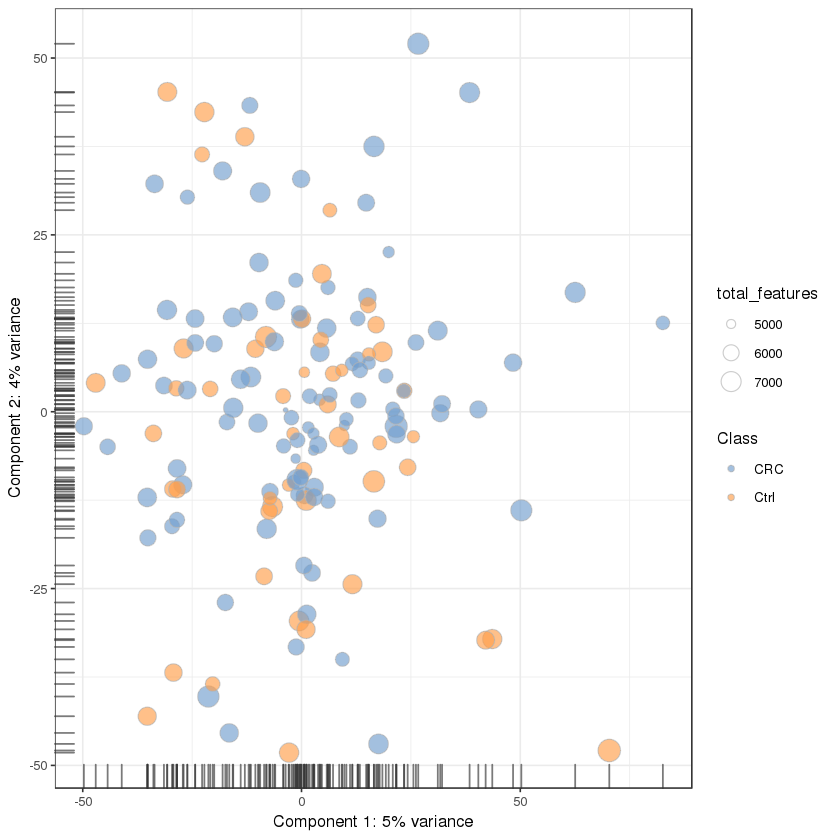

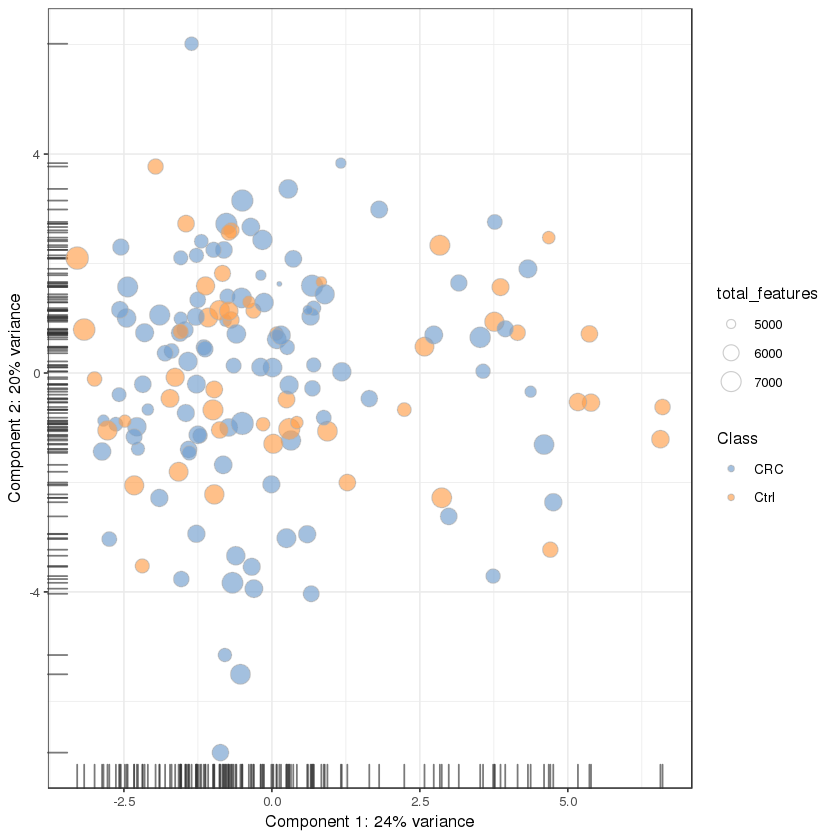

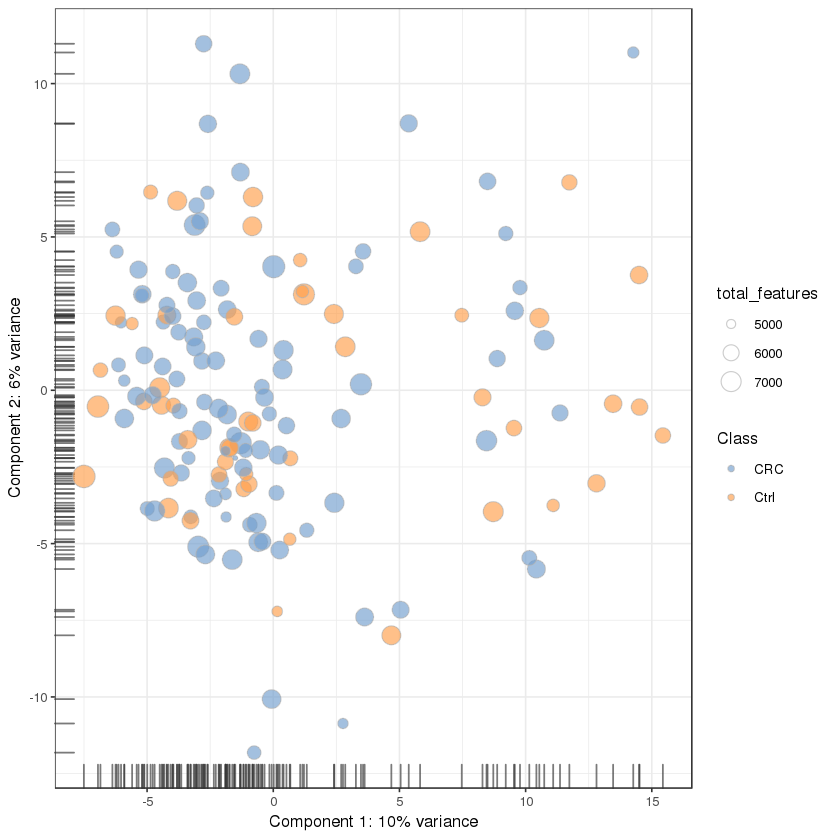

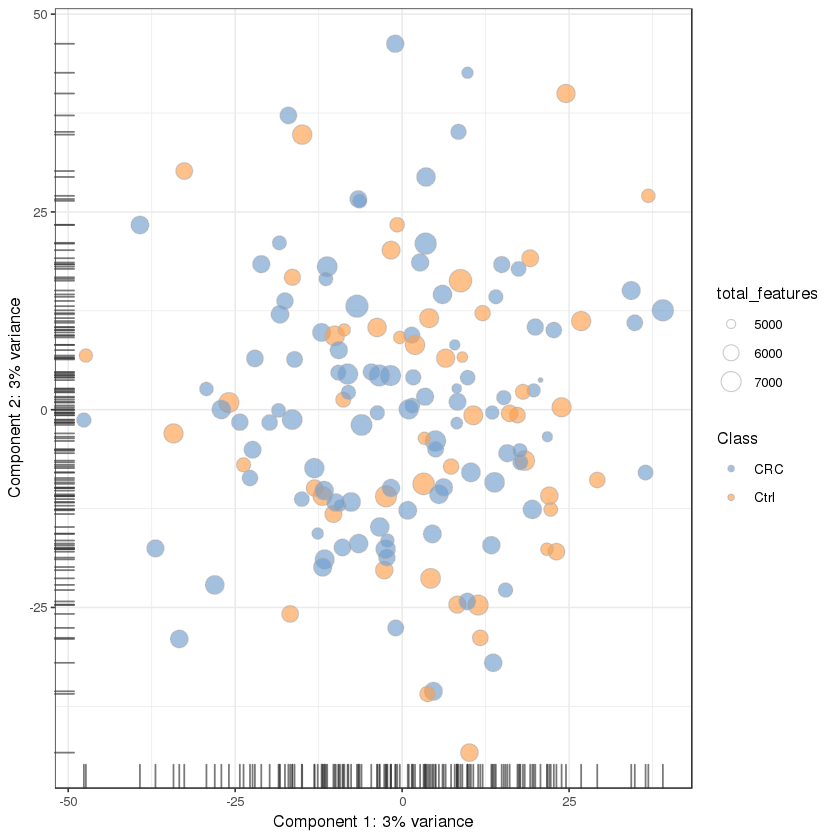

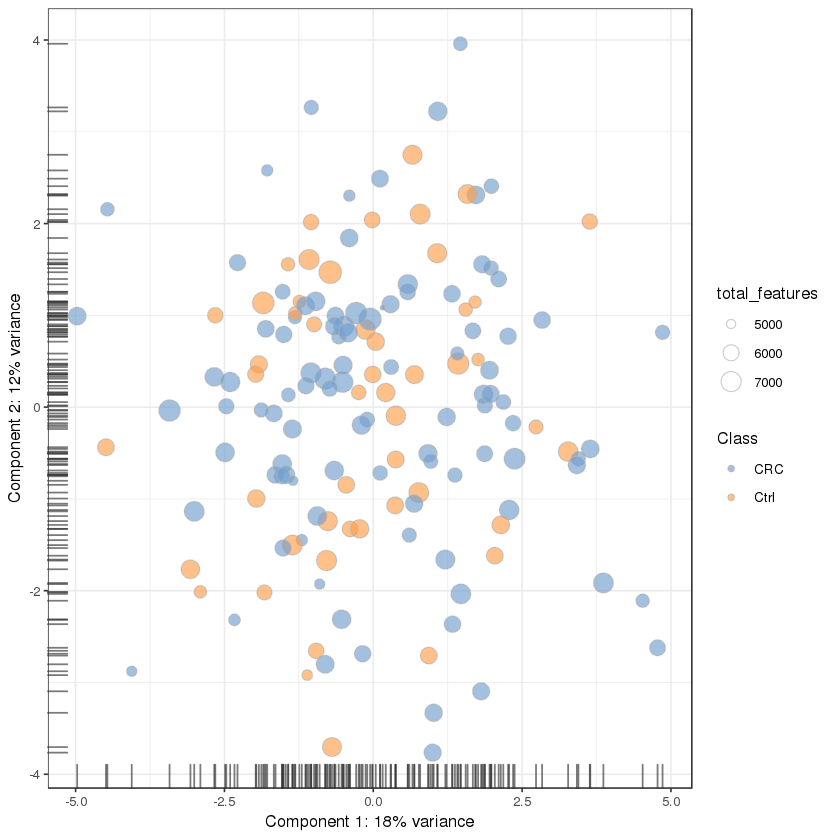

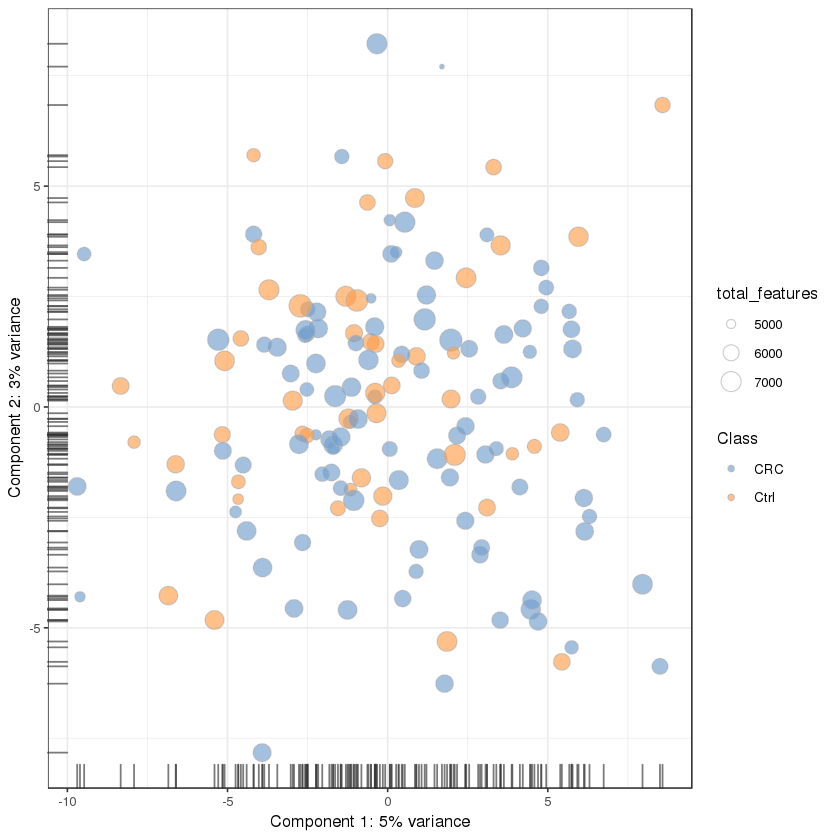

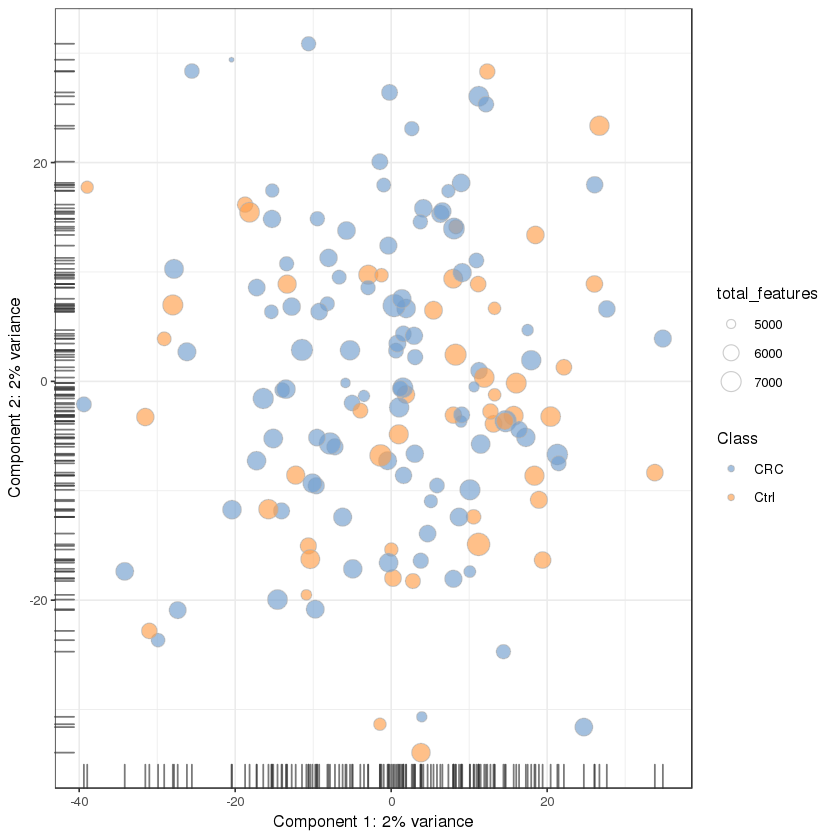

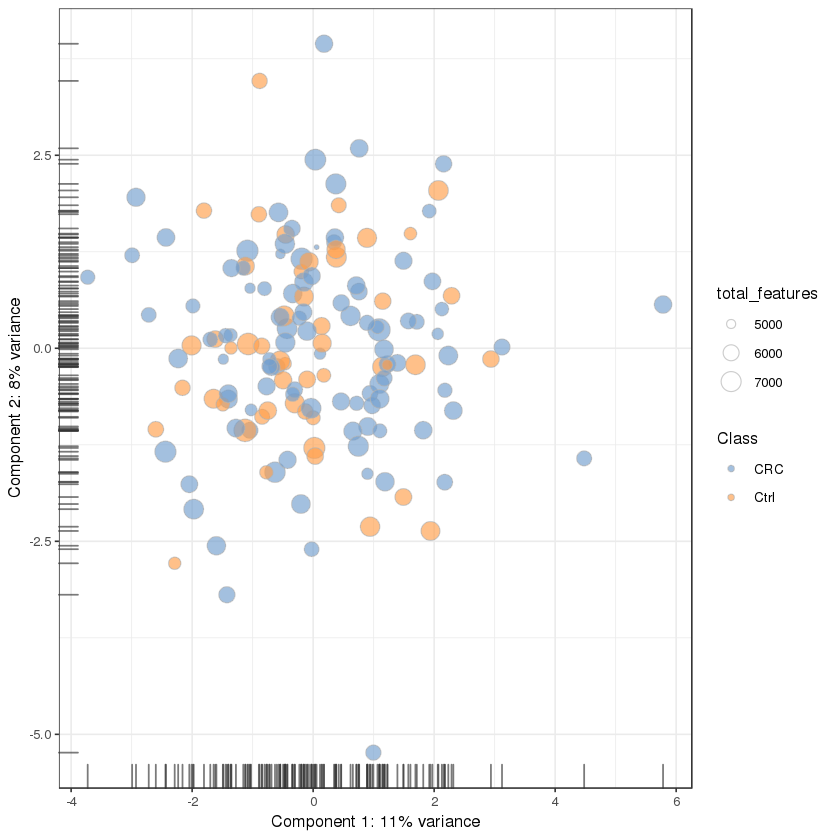

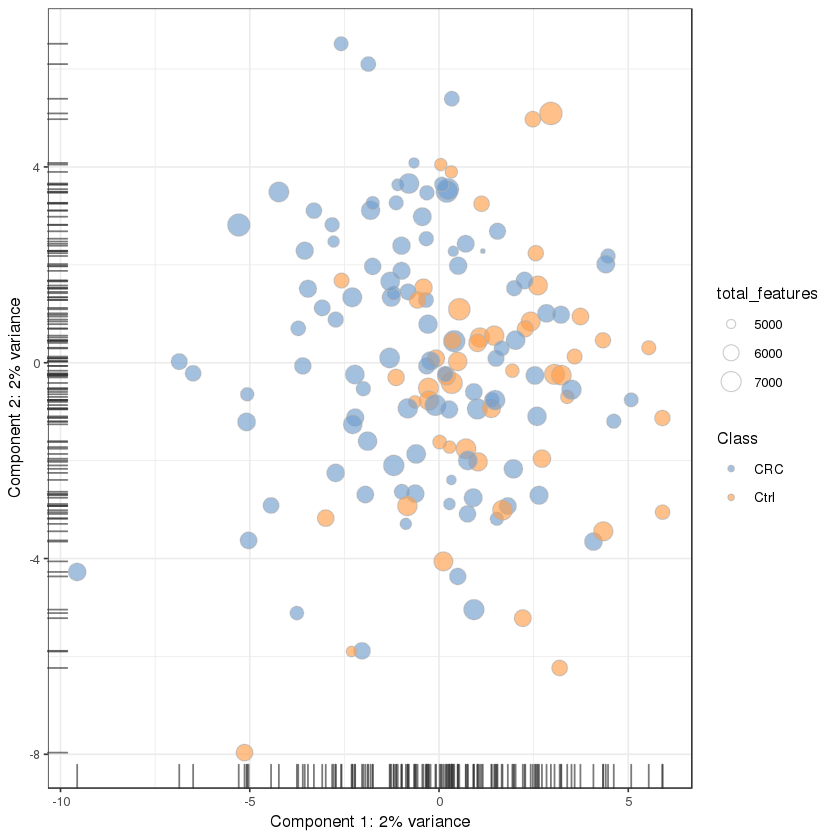

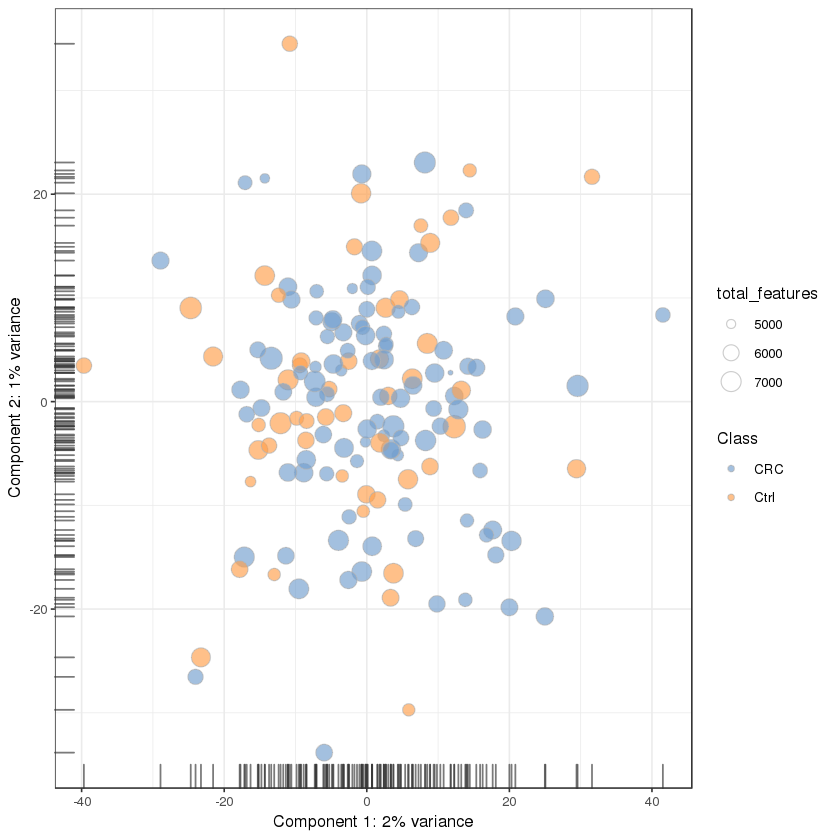

In [52]:
for(i in c('ruvs1','ruvs5','ruvs10','ruvs20')){
    for(j in c(20,300,10000)){
    abc<-plotPCA(
    reads.qc,
    exprs_values = i,
    colour_by = "Class",
    size_by = "total_features",
    ntop=j
)     
        print(abc)
    }
}

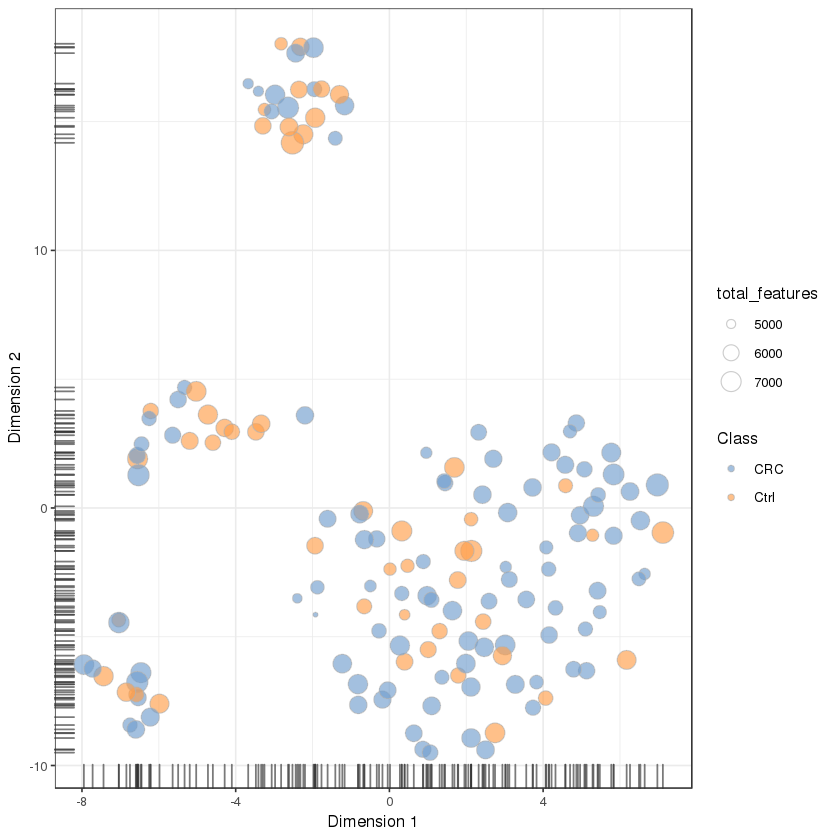

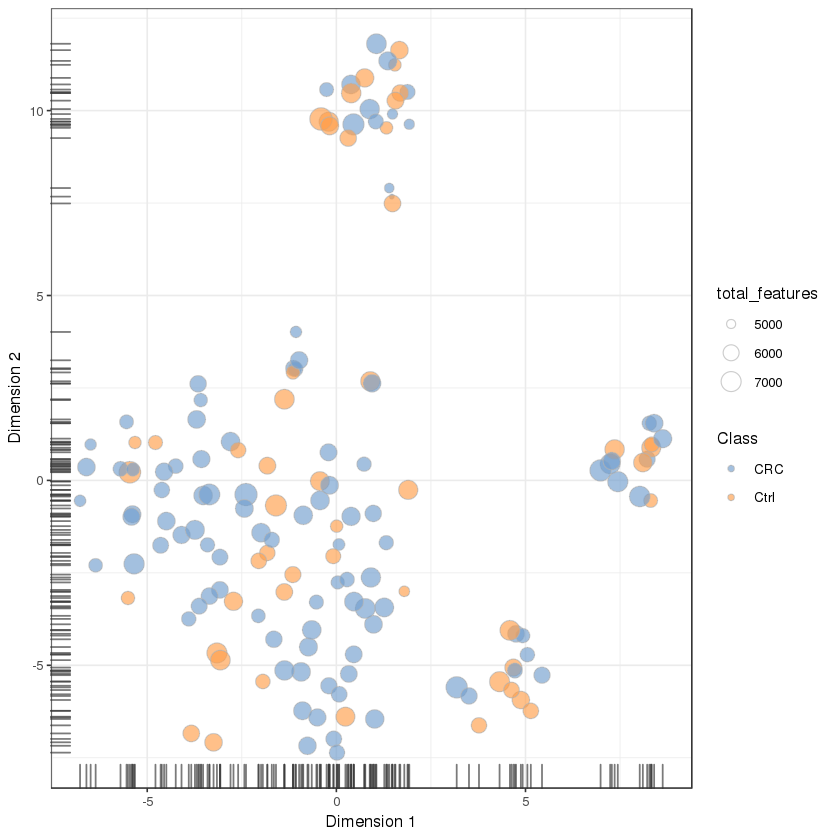

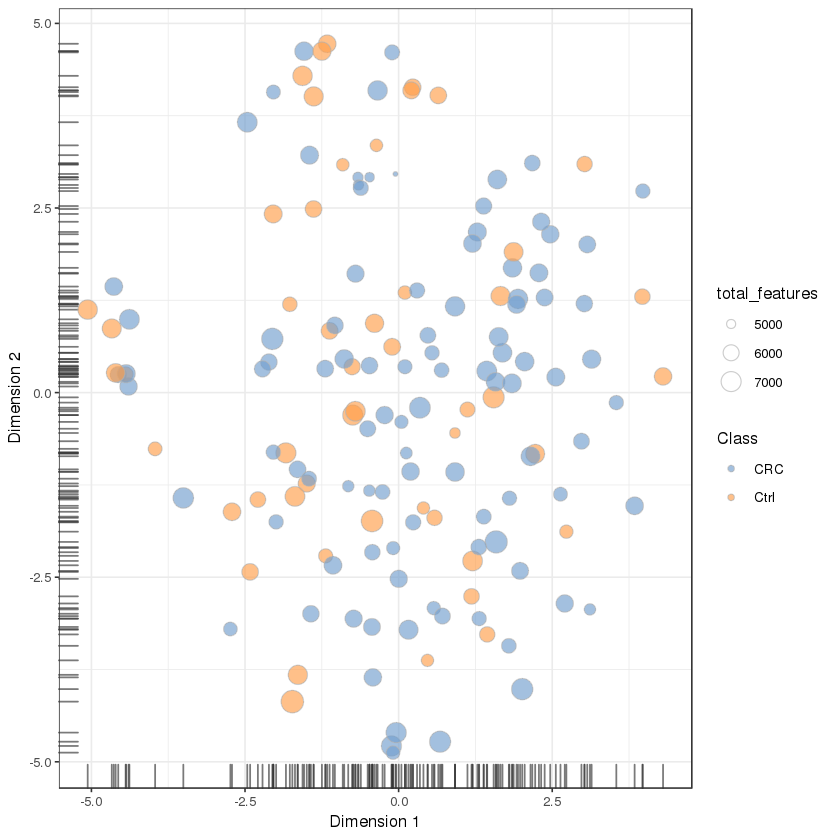

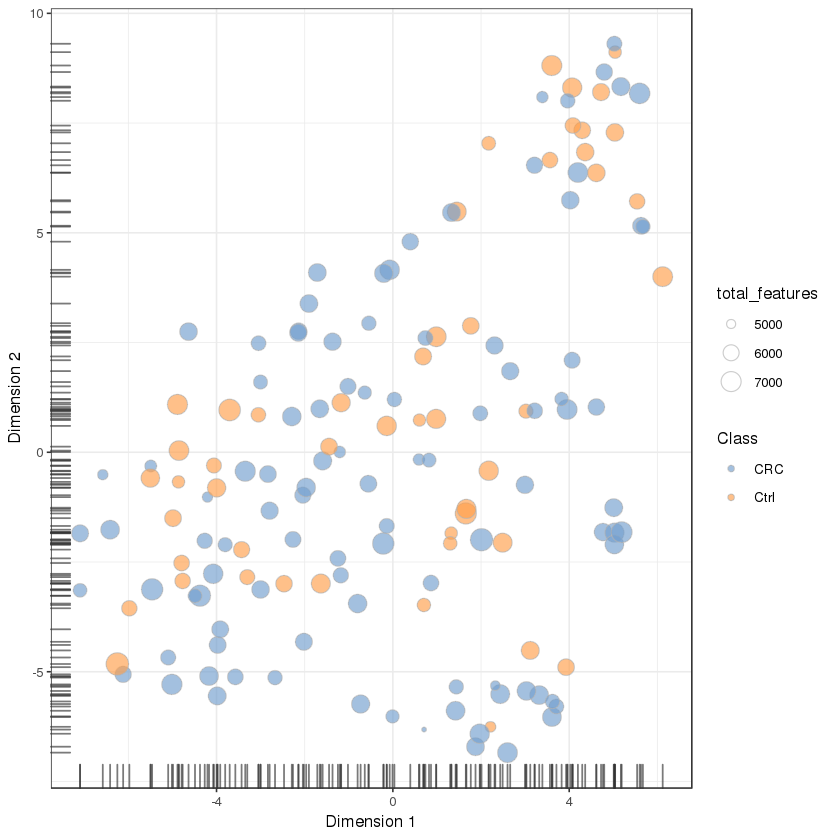

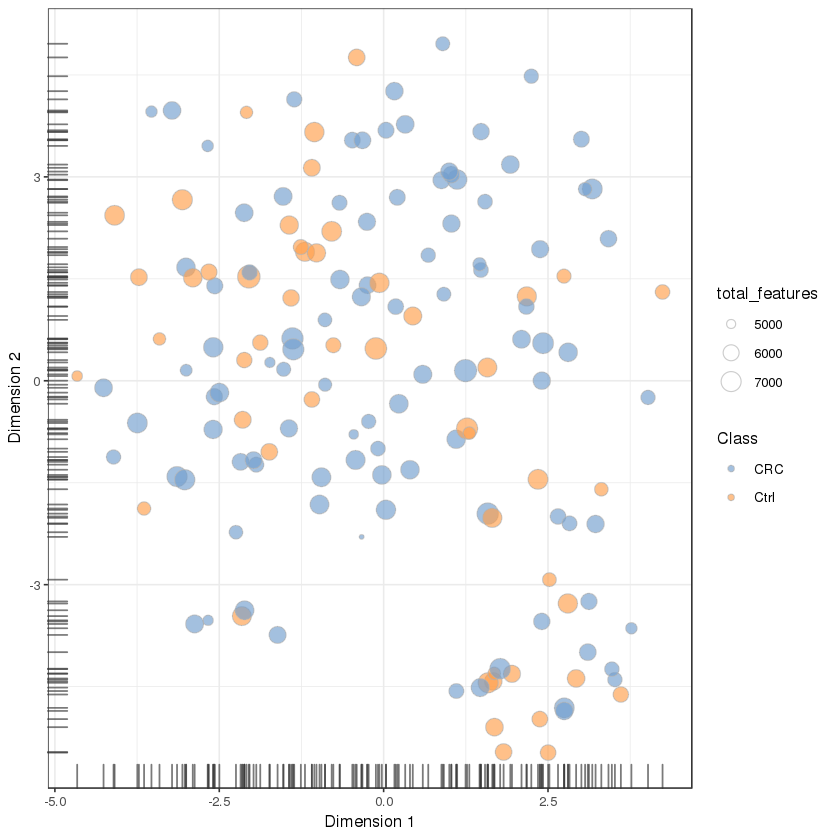

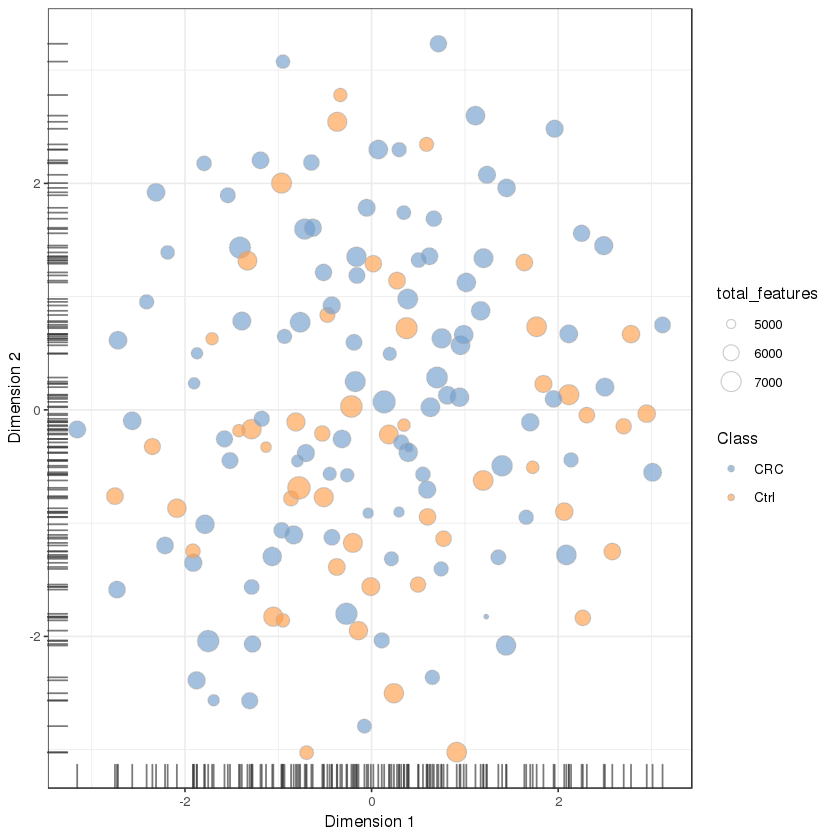

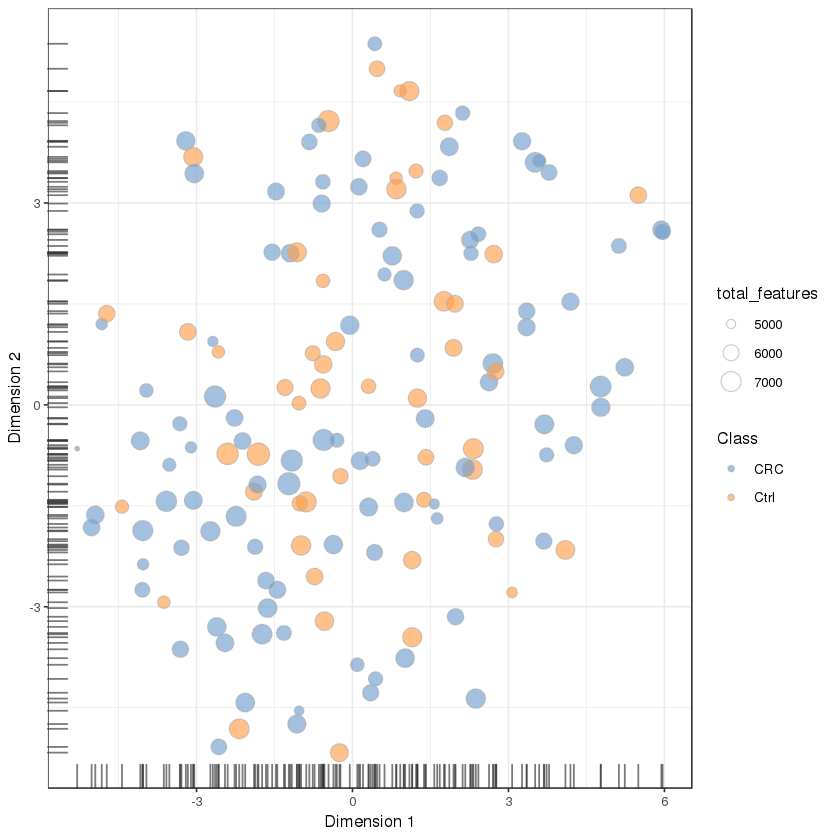

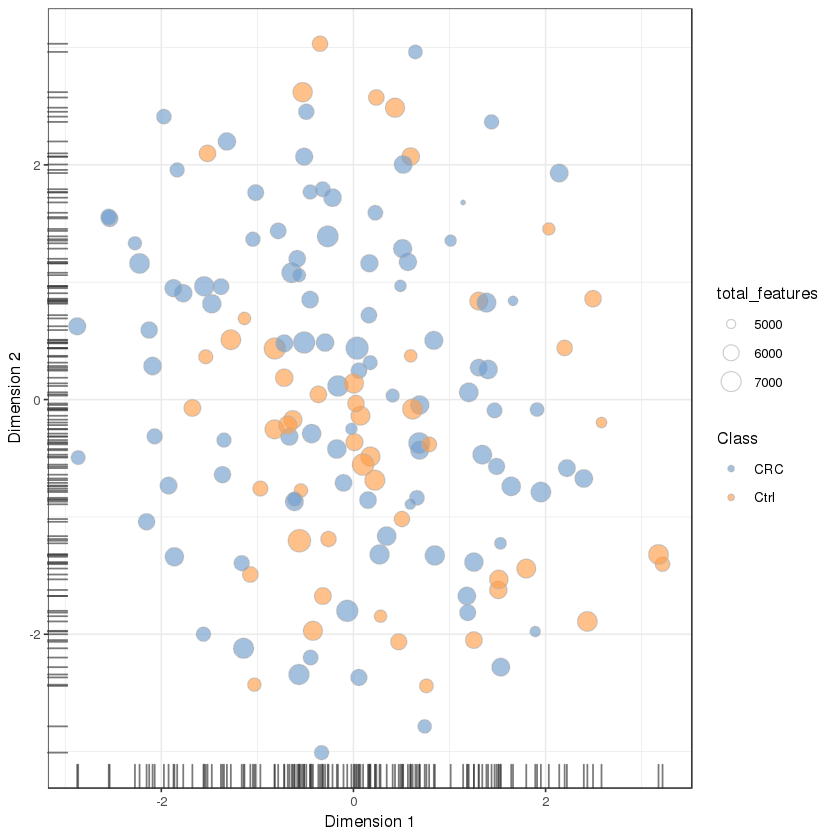

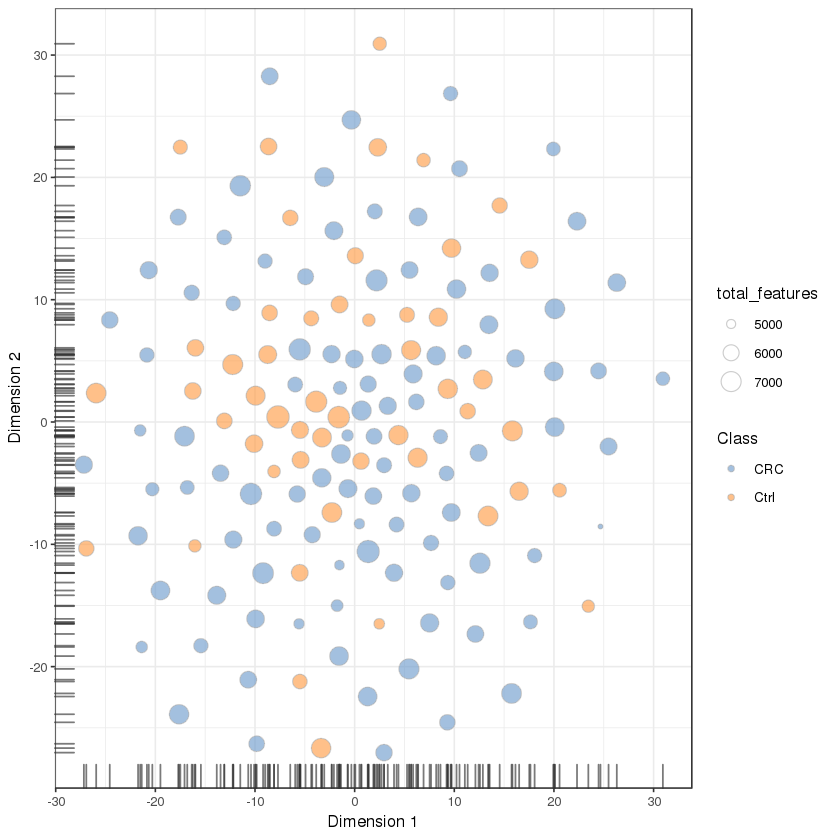

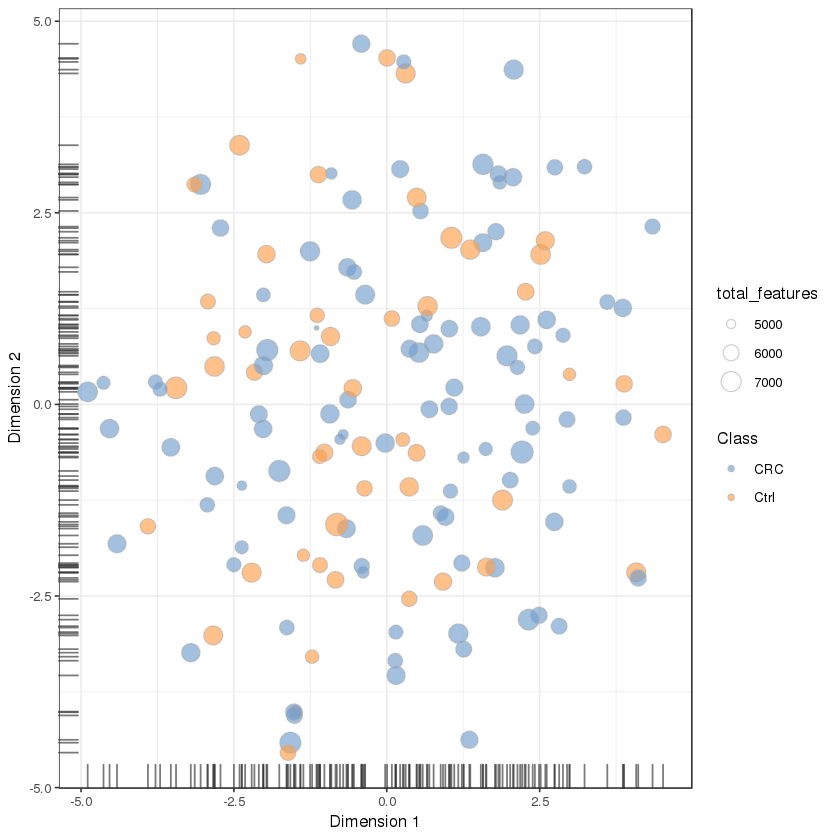

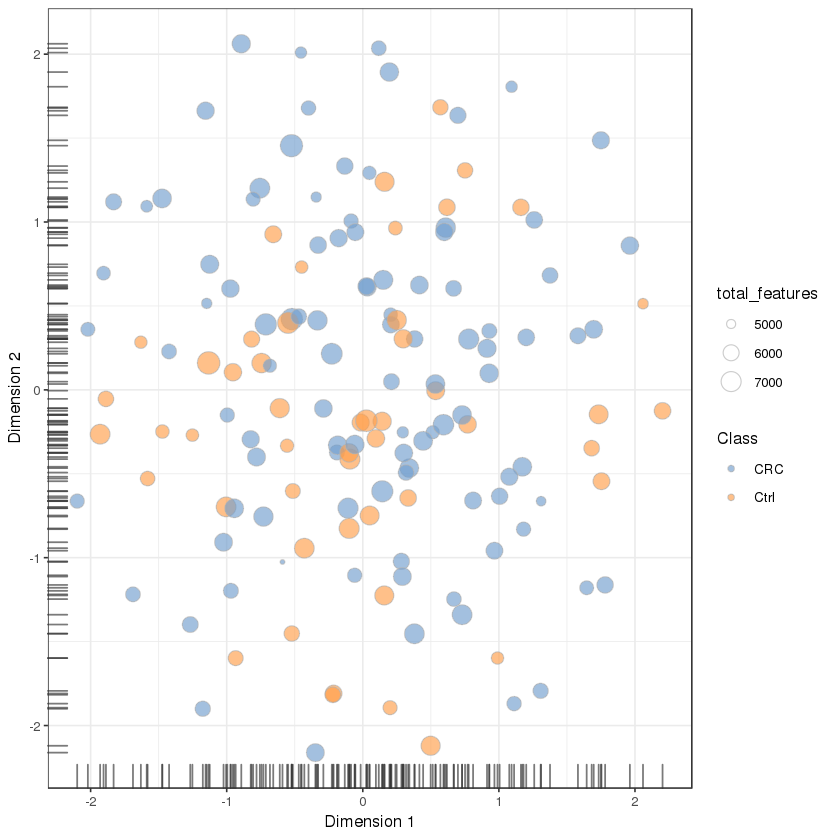

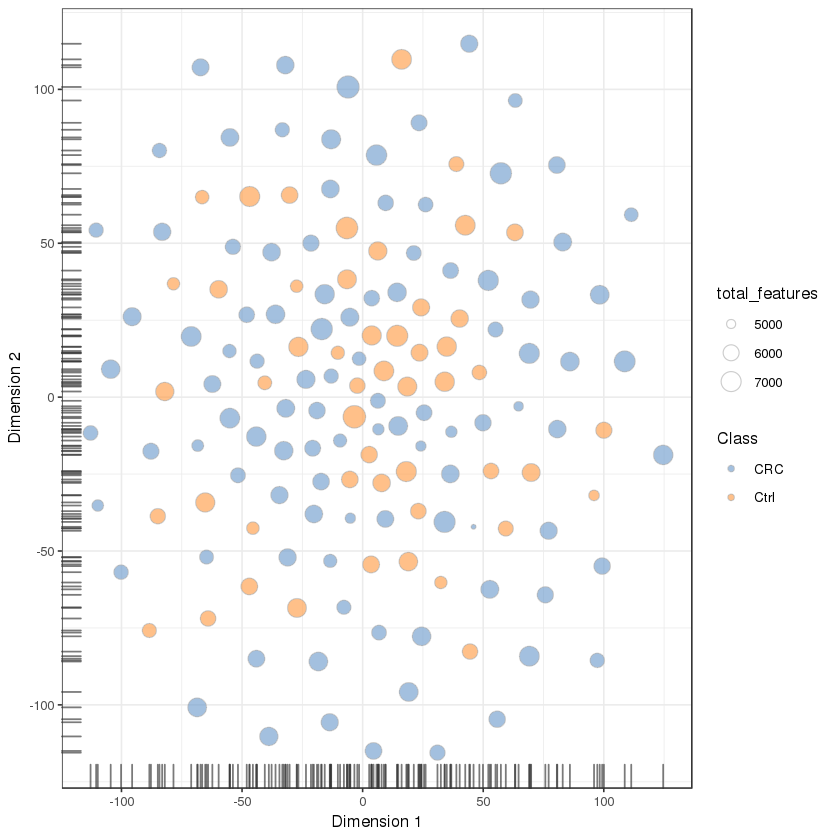

In [53]:
for(i in c('ruvs1','ruvs5','ruvs10','ruvs20')){
    for(j in c(20,300,10000)){
    abc<-plotTSNE(
    reads.qc,
    exprs_values = i,
    colour_by = "Class",
    size_by = "total_features",
    ntop=j
)     
        print(abc)
    }
}

In [142]:
assayNames(reads.qc)

[1] "counts"        "logcounts_raw" "logcounts"     "combat"

Warning message in self$trans$transform(x):
“NaNs produced”Warning message:
“Transformation introduced infinite values in continuous x-axis”Warning message:
“Removed 101 rows containing non-finite values (stat_density).”Warning message in self$trans$transform(x):
“NaNs produced”Warning message:
“Transformation introduced infinite values in continuous x-axis”Warning message:
“Removed 3 rows containing non-finite values (stat_density).”

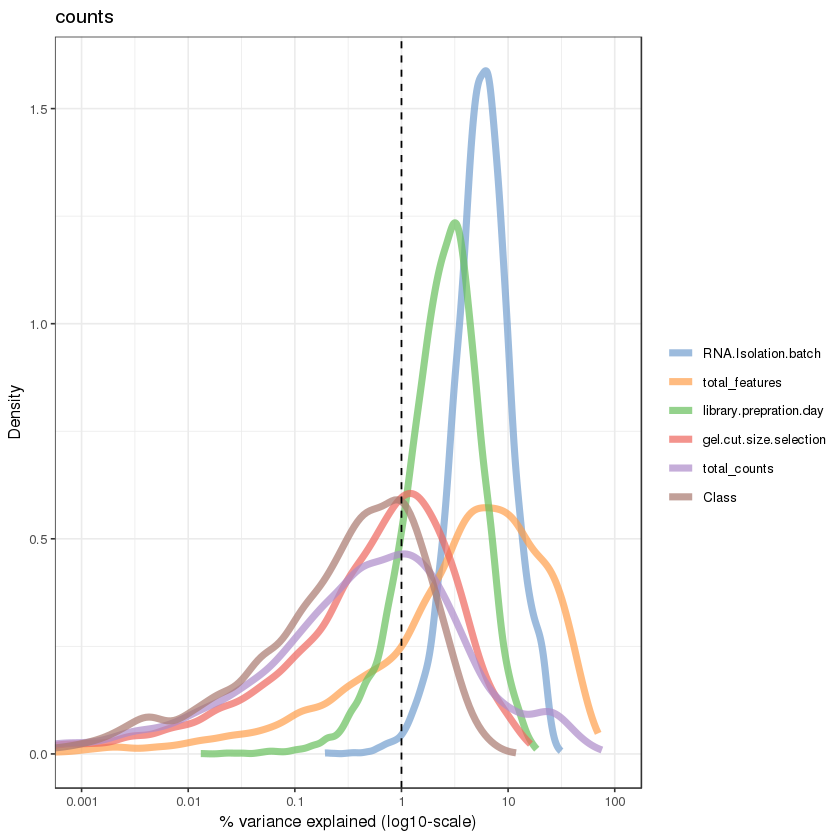

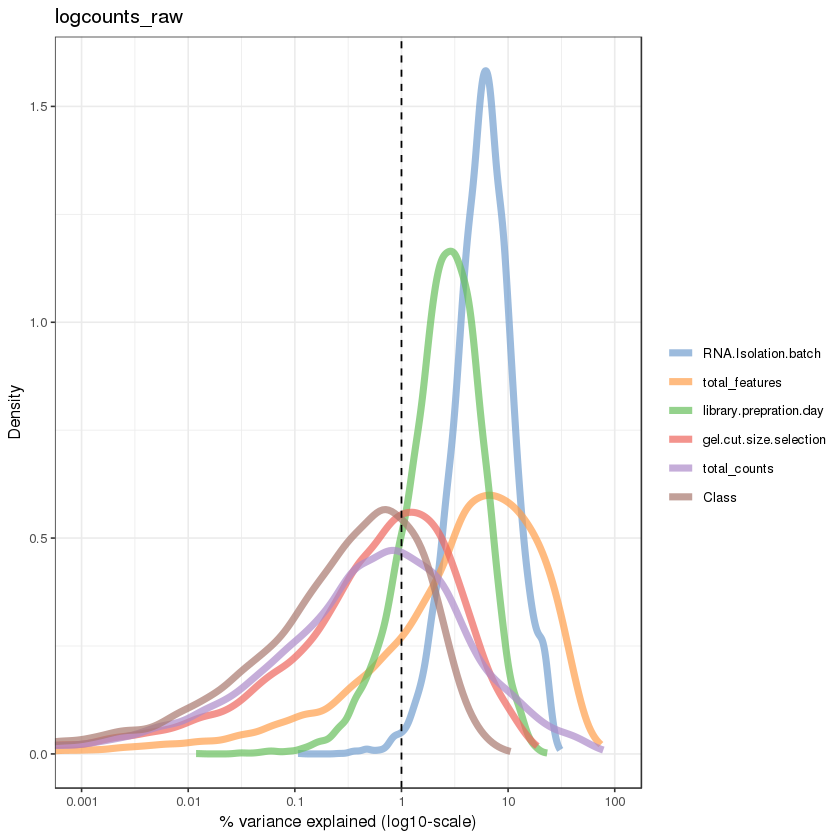

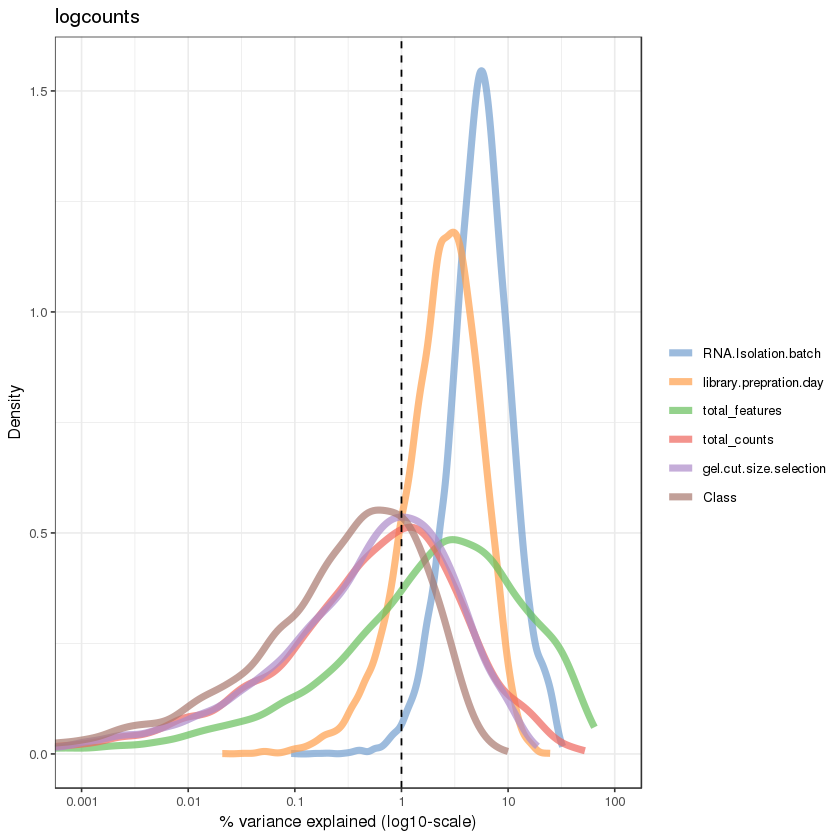

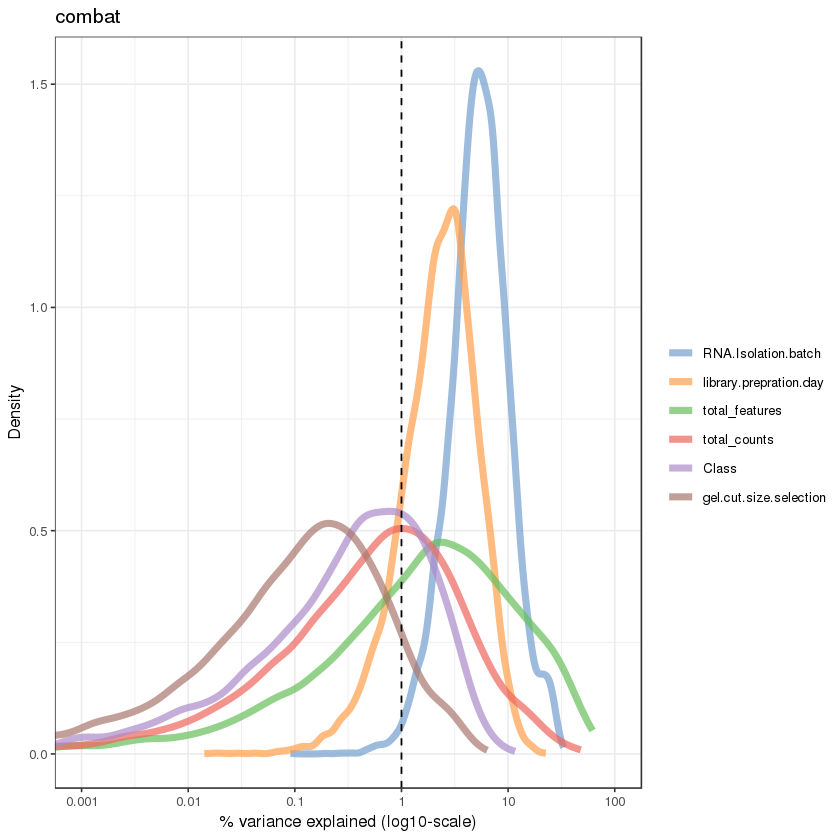

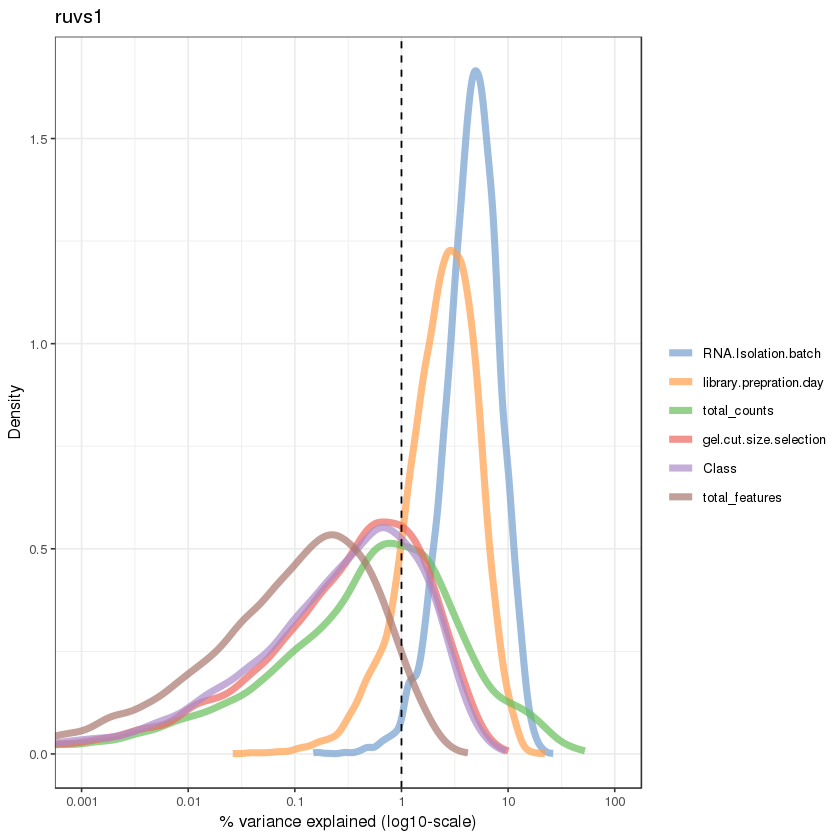

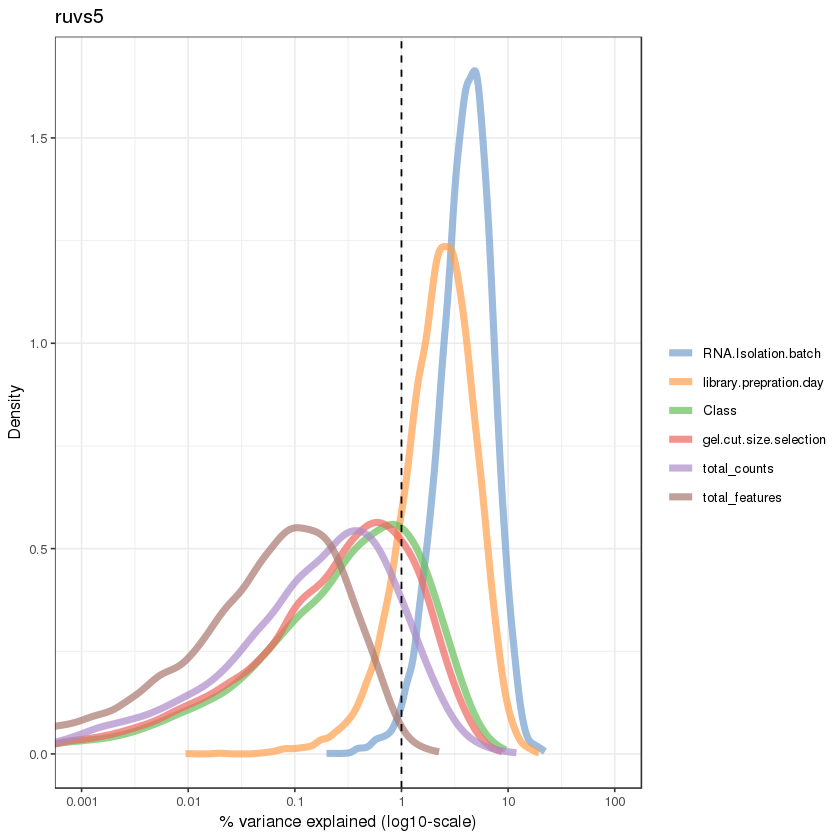

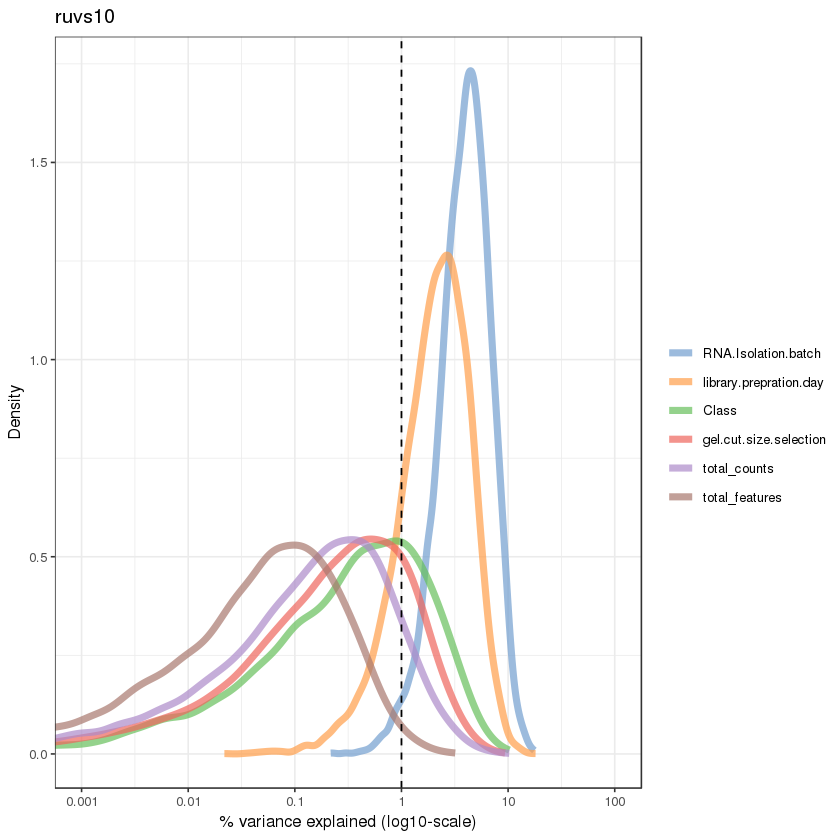

null device 
          1

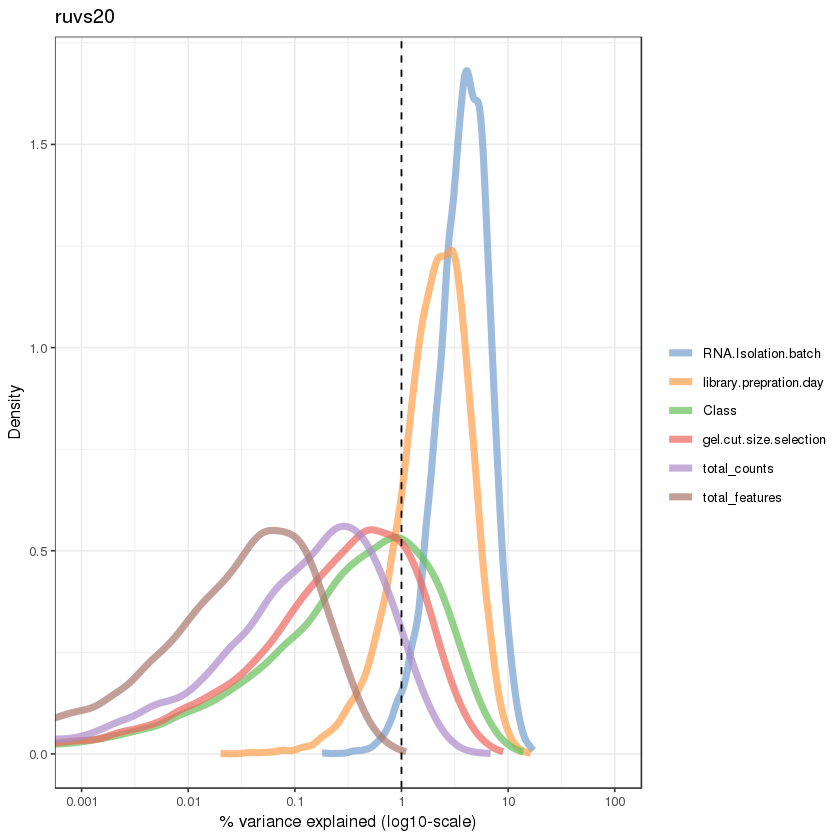

In [146]:
for(n in assayNames(reads.qc)) {
    print(
        plotQC(
            reads.qc,
            type = "expl",
            exprs_values = n,
            variables = c(
                "total_features",
                "total_counts",
                "Class",
                'RNA.Isolation.batch',
                'library.prepration.day',
                'gel.cut.size.selection'
            )
        ) +
        ggtitle(n)
    )
}
dev.off()

#### using Combat
**如果没有batch信息，combat是否无法使用？**

In [159]:
combat_data <- logcounts(reads.qc)
mod_data <- as.data.frame(t(combat_data))
# Basic batch removal
mod0 = model.matrix(~ 1, data = mod_data) 
# Preserve biological variability
mod1 = model.matrix(~ reads.qc$Class, data = mod_data) 
# adjust for total genes detected
mod2 = model.matrix(~ reads.qc$total_features, data = mod_data)

In [163]:
mod1

(Intercept) reads.qc$ClassCtrl
Sample_1S3  1           0                 
Sample_1S6  1           0                 
Sample_1S9  1           0                 
Sample_1S12 1           0                 
Sample_1S15 1           0                 
Sample_1S18 1           0                 
Sample_1S21 1           0                 
Sample_1S24 1           0                 
Sample_4S2  1           0                 
Sample_4S5  1           0                 
Sample_4S8  1           0                 
Sample_4S11 1           0                 
Sample_4S14 1           0                 
Sample_4S17 1           0                 
Sample_4S20 1           0                 
Sample_4S23 1           0                 
Sample_2S1  1           1                 
Sample_2S4  1           1                 
Sample_2S7  1           1                 
Sample_2S10 1           1                 
Sample_2S13 1           1                 
Sample_2S16 1           1                 
Sample_2S19 1           1                 
Sample_2S22 1           1                 
Sample_4S3  1           0                 
Sample_4S6  1           0                 
Sample_4S9  1           0                 
Sample_4S12 1           0                 
Sample_4S15 1           0                 
Sample_4S18 1           0                 
⋮           ⋮           ⋮                 
Sample_N27  1           0                 
Sample_N33  1           0                 
Sample_N39  1           0                 
Sample_N45  1           0                 
Sample_N4   1           0                 
Sample_N10  1           0                 
Sample_N16  1           0                 
Sample_N22  1           0                 
Sample_N28  1           0                 
Sample_N34  1           0                 
Sample_N40  1           1                 
Sample_N46  1           0                 
Sample_N5   1           0                 
Sample_N11  1           0                 
Sample_N17  1           0                 
Sample_N23  1           0                 
Sample_N29  1           0                 
Sample_N35  1           0                 
Sample_N41  1           0                 
Sample_N47  1           0                 
Sample_N6   1           0                 
Sample_N12  1           0                 
Sample_N18  1           0                 
Sample_N24  1           0                 
Sample_N30  1           0                 
Sample_N36  1           0                 
Sample_N42  1           0                 
Sample_N48  1           0                 
Sample_N50  1           0                 
Sample_N49  1           1

In [161]:
dim(reads.qc)

[1] 10105   150

In [ ]:
'RNA Isolation batch','library prepration day','gel cut size selection'

In [133]:
as.numeric(wholeanno$gel.cut.size.selection)

[1]  1  1  1  7  5  6  5 11  1  1  1  3  5  6  2 11  1  1  1  3  5  5  1 11  2
 [26]  2  2  4  7  5  6 10  2  2  2  4  7  5  6 10  2  2  2  8  7  7  6  4  3  3
 [51]  3  5  8  4  5  9  3  3  3  3  8  2  5  9  4  4  4  6  3  3  4  8  4  4  4
 [76]  4  4  8  4 10  5  5  5  8  1  2  3  6  5  5  5  5  3  1  3  6  7  6  6  6
[101]  7  2  1  2  5  6  6  6  6  1  6  2  5  7  7  1  1  2  4  1  4  7  7  1  9
[126]  6 12  1  4 12  9  8  8  2  2  6  3 12  6 10  8  8  2 10  4 11 12  3 11  2

In [162]:
assay(reads.qc, "combat") <- ComBat(
    dat = t(mod_data), 
    batch = factor(wholeanno$gel.cut.size.selection), 
    mod = mod1,
    par.prior = TRUE,
    prior.plots = FALSE
)

Found12batches
Adjusting for1covariate(s) or covariate level(s)


Standardizing Data across genes


Fitting L/S model and finding priors
Finding parametric adjustments
Adjusting the Data



In [135]:
write.csv(assay(reads.qc,'combat'), "data/GSE_binary_batch_combat_batch3.csv")

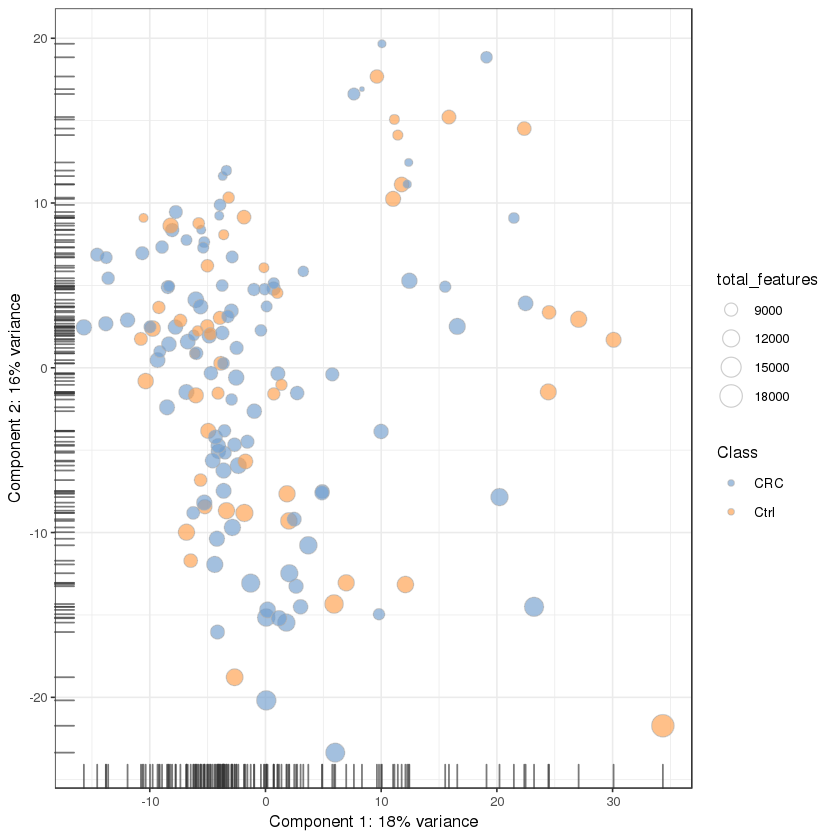

In [109]:
plotPCA(
    reads.qc,
    exprs_values ='combat',
    colour_by = "Class",
    size_by = "total_features"
)

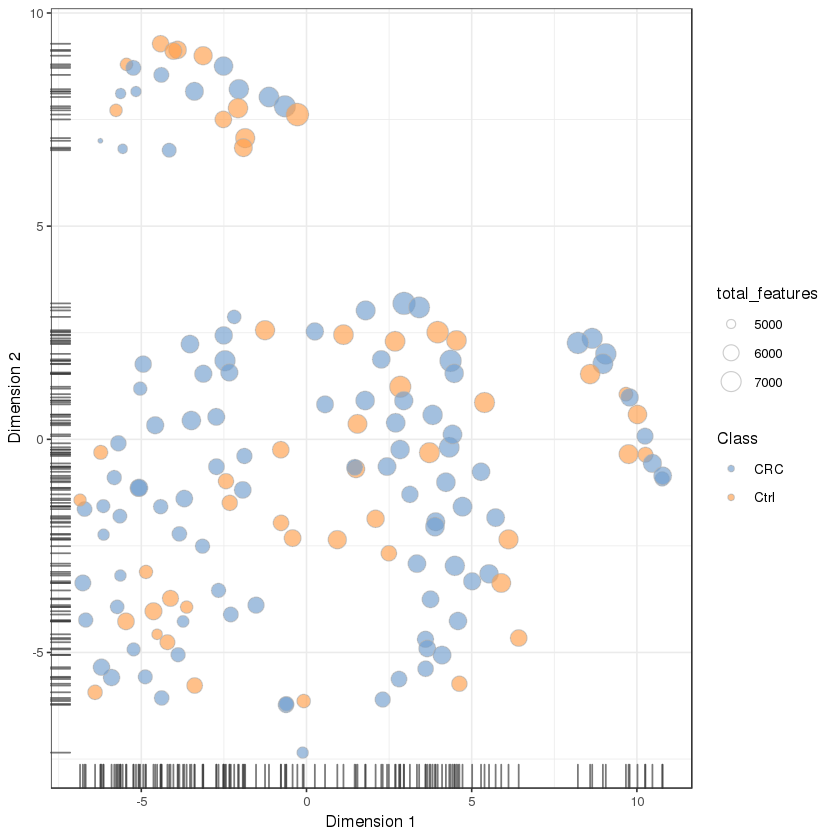

In [58]:
plotTSNE(
    reads.qc.impute,
    exprs_values ='combat',
    colour_by = "Class",
    size_by = "total_features",
    ntop=100
)

#### using GLM